# Imports and Loading Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, BayesianRidge, SGDRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s3e20/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s3e20/test.csv")
sample = pd.read_csv("/kaggle/input/playground-series-s3e20/sample_submission.csv")

# Basic Data Exploration

In [3]:
train.head()

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-0.510_29.290_2019_00     -0.51      29.29  2019        0   
1  ID_-0.510_29.290_2019_01     -0.51      29.29  2019        1   
2  ID_-0.510_29.290_2019_02     -0.51      29.29  2019        2   
3  ID_-0.510_29.290_2019_03     -0.51      29.29  2019        3   
4  ID_-0.510_29.290_2019_04     -0.51      29.29  2019        4   

   SulphurDioxide_SO2_column_number_density  \
0                                 -0.000108   
1                                  0.000021   
2                                  0.000514   
3                                       NaN   
4                                 -0.000079   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.603019   
1                                      0.728214   
2                                      0.748199   
3                                           NaN   
4                                      0.676296   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                       -0.000065   
1                                        0.000014   
2                                        0.000385   
3                                             NaN   
4                                       -0.000048   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  ...  \
0                       0.255668                           -98.593887  ...   
1                       0.130988                            16.592861  ...   
2                       0.110018                            72.795837  ...   
3                            NaN                                  NaN  ...   
4                       0.121164                             4.121269  ...   

   Cloud_cloud_top_height  Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
0             3664.436218               61085.809570              2615.120483   
1             3651.190311               66969.478735              3174.572424   
2             4216.986492               60068.894448              3516.282669   
3             5228.507736               51064.547339              4180.973322   
4             3980.598120               63751.125781              3355.710107   

   Cloud_cloud_optical_depth  Cloud_surface_albedo  \
0                  15.568533              0.272292   
1                   8.690601              0.256830   
2                  21.103410              0.251101   
3                  15.386899              0.262043   
4                   8.114694              0.235847   

   Cloud_sensor_azimuth_angle  Cloud_sensor_zenith_angle  \
0                  -12.628986                  35.632416   
1                   30.359375                  39.557633   
2                   15.377883                  30.401823   
3                  -11.293399                  24.380357   
4                   38.532263                  37.392979   

   Cloud_solar_azimuth_angle  Cloud_solar_zenith_angle  emission  
0                -138.786423                 30.752140  3.750994  
1                -145.183930                 27.251779  4.025176  
2                -142.519545                 26.193296  4.231381  
3                -132.665828                 28.829155  4.305286  
4                -141.509805                 22.204612  4.347317  

[5 rows x 76 columns]

In [4]:
train.describe()

latitude     longitude          year       week_no  \
count  79023.000000  79023.000000  79023.000000  79023.000000   
mean      -1.891072     29.880155   2020.000000     26.000000   
std        0.694522      0.810375      0.816502     15.297155   
min       -3.299000     28.228000   2019.000000      0.000000   
25%       -2.451000     29.262000   2019.000000     13.000000   
50%       -1.882000     29.883000   2020.000000     26.000000   
75%       -1.303000     30.471000   2021.000000     39.000000   
max       -0.510000     31.532000   2021.000000     52.000000   

       SulphurDioxide_SO2_column_number_density  \
count                              64414.000000   
mean                                   0.000048   
std                                    0.000272   
min                                   -0.000996   
25%                                   -0.000096   
50%                                    0.000024   
75%                                    0.000153   
max                                    0.004191   

       SulphurDioxide_SO2_column_number_density_amf  \
count                                  64414.000000   
mean                                       0.834848   
std                                        0.185382   
min                                        0.241822   
25%                                        0.705817   
50%                                        0.809118   
75%                                        0.942792   
max                                        1.885239   

       SulphurDioxide_SO2_slant_column_number_density  \
count                                    64414.000000   
mean                                         0.000035   
std                                          0.000206   
min                                         -0.000887   
25%                                         -0.000078   
50%                                          0.000019   
75%                                          0.000121   
max                                          0.004236   

       SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
count                   64414.000000                         64414.000000   
mean                        0.158418                            -7.925870   
std                         0.071364                            64.263368   
min                         0.000000                          -179.537059   
25%                         0.110535                           -56.782383   
50%                         0.161855                           -12.441726   
75%                         0.211824                            72.059990   
max                         0.299998                           122.095200   

       SulphurDioxide_sensor_zenith_angle  ...  Cloud_cloud_top_height  \
count                        64414.000000  ...            78539.000000   
mean                            37.436189  ...             5592.377478   
std                             14.149950  ...             1428.503002   
min                              0.099237  ...             1050.661782   
25%                             28.844520  ...             4595.400519   
50%                             37.784299  ...             5573.854309   
75%                             47.634875  ...             6542.303642   
max                             66.242012  ...            12384.239458   

       Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
count               78539.000000             78539.000000   
mean                59420.297456              4670.430869   
std                  9051.163609              1359.251583   
min                 24779.033704              1050.496816   
25%                 53175.779928              3680.856344   
50%                 59332.532548              4621.755170   
75%                 65663.842684              5572.983223   
max                 89291.615576             11384.239458   

       Cloud_cloud_optical_depth  Cloud_surf

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

In [6]:
print(train.shape)
print(test.shape)

(79023, 76)
(24353, 75)


In [7]:
pd.set_option('display.max_rows', None)

missing_data = pd.DataFrame(train.isnull().sum()[train.isnull().sum() != 0].sort_values(ascending = False),
                            columns = ["Number of missing rows"])
missing_data['% of total'] = missing_data.apply(lambda row: round(row/len(train)*100,2))
missing_data

Number of missing rows  \
UvAerosolLayerHeight_aerosol_pressure                                78584   
UvAerosolLayerHeight_solar_zenith_angle                              78584   
UvAerosolLayerHeight_aerosol_height                                  78584   
UvAerosolLayerHeight_aerosol_optical_depth                           78584   
UvAerosolLayerHeight_sensor_zenith_angle                             78584   
UvAerosolLayerHeight_sensor_azimuth_angle                            78584   
UvAerosolLayerHeight_solar_azimuth_angle                             78584   
NitrogenDioxide_NO2_slant_column_number_density                      18320   
NitrogenDioxide_tropopause_pressure                                  18320   
NitrogenDioxide_tropospheric_NO2_column_number_...                   18320   
NitrogenDioxide_absorbing_aerosol_index                              18320   
NitrogenDioxide_cloud_fraction                                       18320   
NitrogenDioxide_sensor_altitude                                      18320   
NitrogenDioxide_sensor_azimuth_angle                                 18320   
NitrogenDioxide_sensor_zenith_angle                                  18320   
NitrogenDioxide_solar_azimuth_angle                                  18320   
NitrogenDioxide_stratospheric_NO2_column_number...                   18320   
NitrogenDioxide_solar_zenith_angle                                   18320   
NitrogenDioxide_NO2_column_number_density                            18320   
SulphurDioxide_SO2_column_number_density_amf                         14609   
SulphurDioxide_SO2_column_number_density_15km                        14609   
SulphurDioxide_solar_zenith_angle                                    14609   
SulphurDioxide_solar_azimuth_angle                                   14609   
SulphurDioxide_sensor_zenith_angle                                   14609   
SulphurDioxide_sensor_azimuth_angle                                  14609   
SulphurDioxide_cloud_fraction                                        14609   
SulphurDioxide_SO2_slant_column_number_density                       14609   
SulphurDioxide_SO2_column_number_density                             14609   
Formaldehyde_solar_azimuth_angle                                      7277   
Formaldehyde_sensor_azimuth_angle                                     7277   
Formaldehyde_cloud_fraction                                           7277   
Formaldehyde_solar_zenith_angle                                       7277   
Formaldehyde_sensor_zenith_angle                                      7277   
Formaldehyde_HCHO_slant_column_number_density                         7277   
Formaldehyde_tropospheric_HCHO_column_number_de...                    7277   
Formaldehyde_tropospheric_HCHO_column_number_de...                    7277   
CarbonMonoxide_solar_zenith_angle                                     2122   
CarbonMonoxide_CO_column_number_density                               2122   
CarbonMonoxide_H2O_column_number_density                              2122   
CarbonMonoxide_cloud_height                                           2122   
CarbonMonoxide_sensor_altitude                                        2122   
CarbonMonoxide_sensor_azimuth_angle                                   2122   
CarbonMonoxide_sensor_zenith_angle                                    2122   
CarbonMonoxide_solar_azimuth_angle                                    2122   
Ozone_sensor_azimuth_angle                                             548   
Ozone_solar_azimuth_angle                                              548   
Ozone_sensor_zenith_angle                                              548   
Ozone_solar_zenith_angle                                               548   
Ozone_cloud_fraction                                                   548   
Ozone_O3_slant_column_number_density                                   548   
Ozone_O3_column_number_density_amf                                     548

Observations:
* UV Aerosol Layer Height features have way too many missing values so we will drop these features.
* Cloud, UV Aerosol Index, and Ozone features have missing values that make up <1% of the dataset so we will drop the rows with the missing values.
* For all the other features, we will perform data imputation on them to fill in the missing values.

# Data Cleaning Pt.1
## 1. Dropping Features

In [8]:
train.drop(['UvAerosolLayerHeight_aerosol_pressure', 'UvAerosolLayerHeight_solar_zenith_angle', 'UvAerosolLayerHeight_aerosol_height', 'UvAerosolLayerHeight_aerosol_optical_depth',
            'UvAerosolLayerHeight_sensor_zenith_angle', 'UvAerosolLayerHeight_sensor_azimuth_angle', 'UvAerosolLayerHeight_solar_azimuth_angle'], axis=1, inplace=True)
test.drop(['UvAerosolLayerHeight_aerosol_pressure', 'UvAerosolLayerHeight_solar_zenith_angle', 'UvAerosolLayerHeight_aerosol_height', 'UvAerosolLayerHeight_aerosol_optical_depth',
            'UvAerosolLayerHeight_sensor_zenith_angle', 'UvAerosolLayerHeight_sensor_azimuth_angle', 'UvAerosolLayerHeight_solar_azimuth_angle'], axis=1, inplace=True)

## 2. Dropping rows

In [9]:
train.dropna(subset=['Cloud_cloud_optical_depth', 'UvAerosolIndex_solar_azimuth_angle', 'Ozone_O3_column_number_density_amf', 'CarbonMonoxide_cloud_height'], inplace=True)

# Univariate Analysis
## Emission

Text(0.5, 1.0, 'Distribution of emisssion')

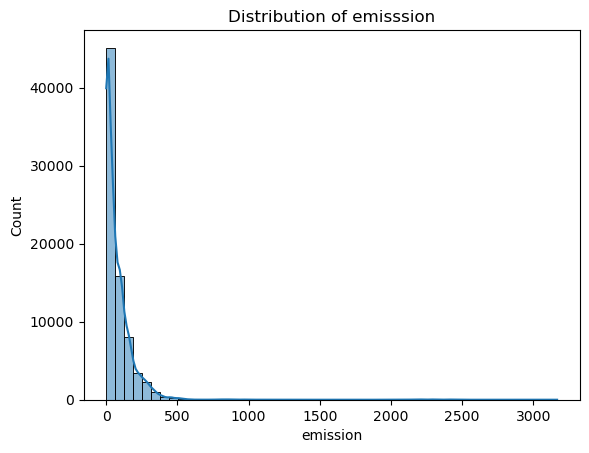

In [10]:
sns.histplot(train, x='emission', bins=50, kde=True)
plt.title("Distribution of emisssion")

Observations:
* It is rightly skewed.
* Most emissions are below 500.
* Might need to conduct outlier analysis.

## Year and Week No.

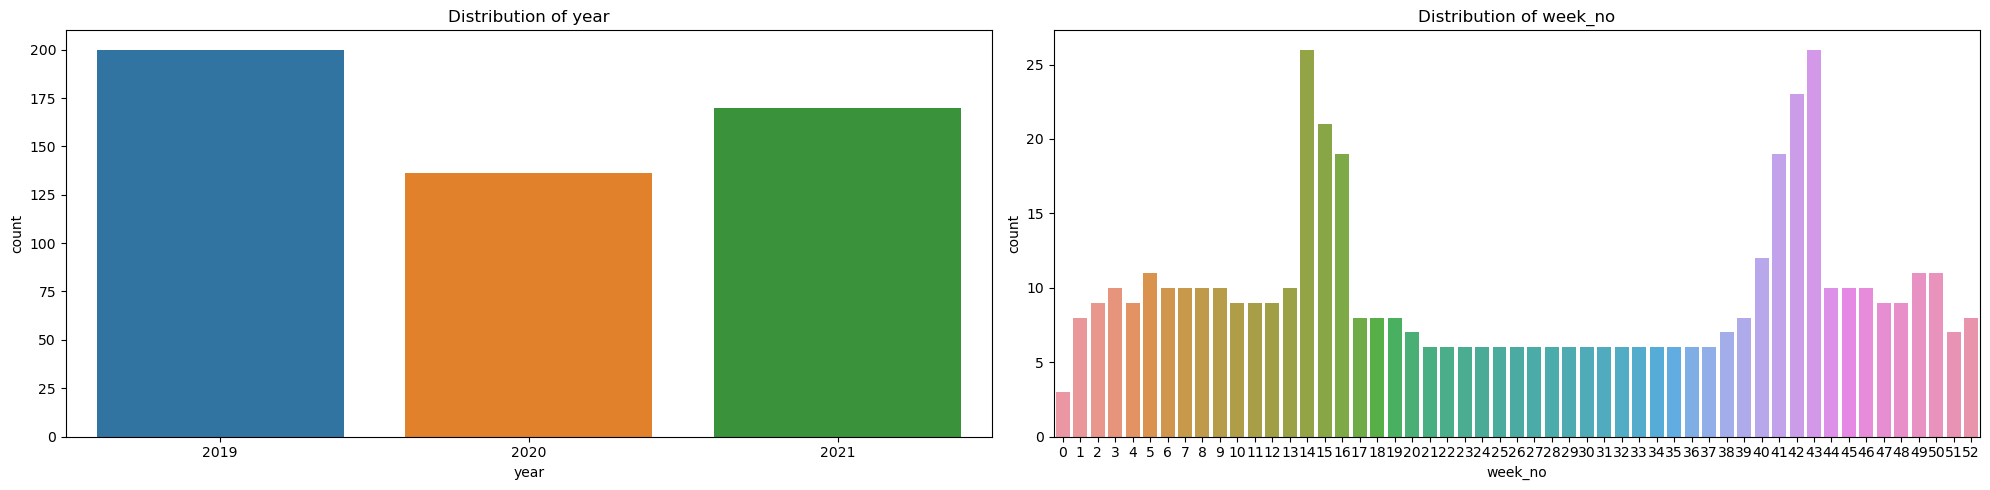

In [11]:
plt.figure(figsize=(20,5))
for index,column in enumerate(train.columns[3:5]):
    plt.subplot(1,2,index+1)
    sns.countplot(train[train['emission'] > 500], x=column)
    plt.xlabel(column)
    plt.title(f"Distribution of {column}")
    plt.tight_layout()

Observations:
* 2019 has the most data point and 2020 has the least data points possibly due to COVID.
* Weeks 14,15,16,41,42,43 seems to have the most data points.
    * Assuming that each week corresponds to the calendar year (e.g. Week 0 is the first week of January), weeks 14,15,16 are in April while weeks 41,42,43 are in October to November.

## Sulphur Dioxide

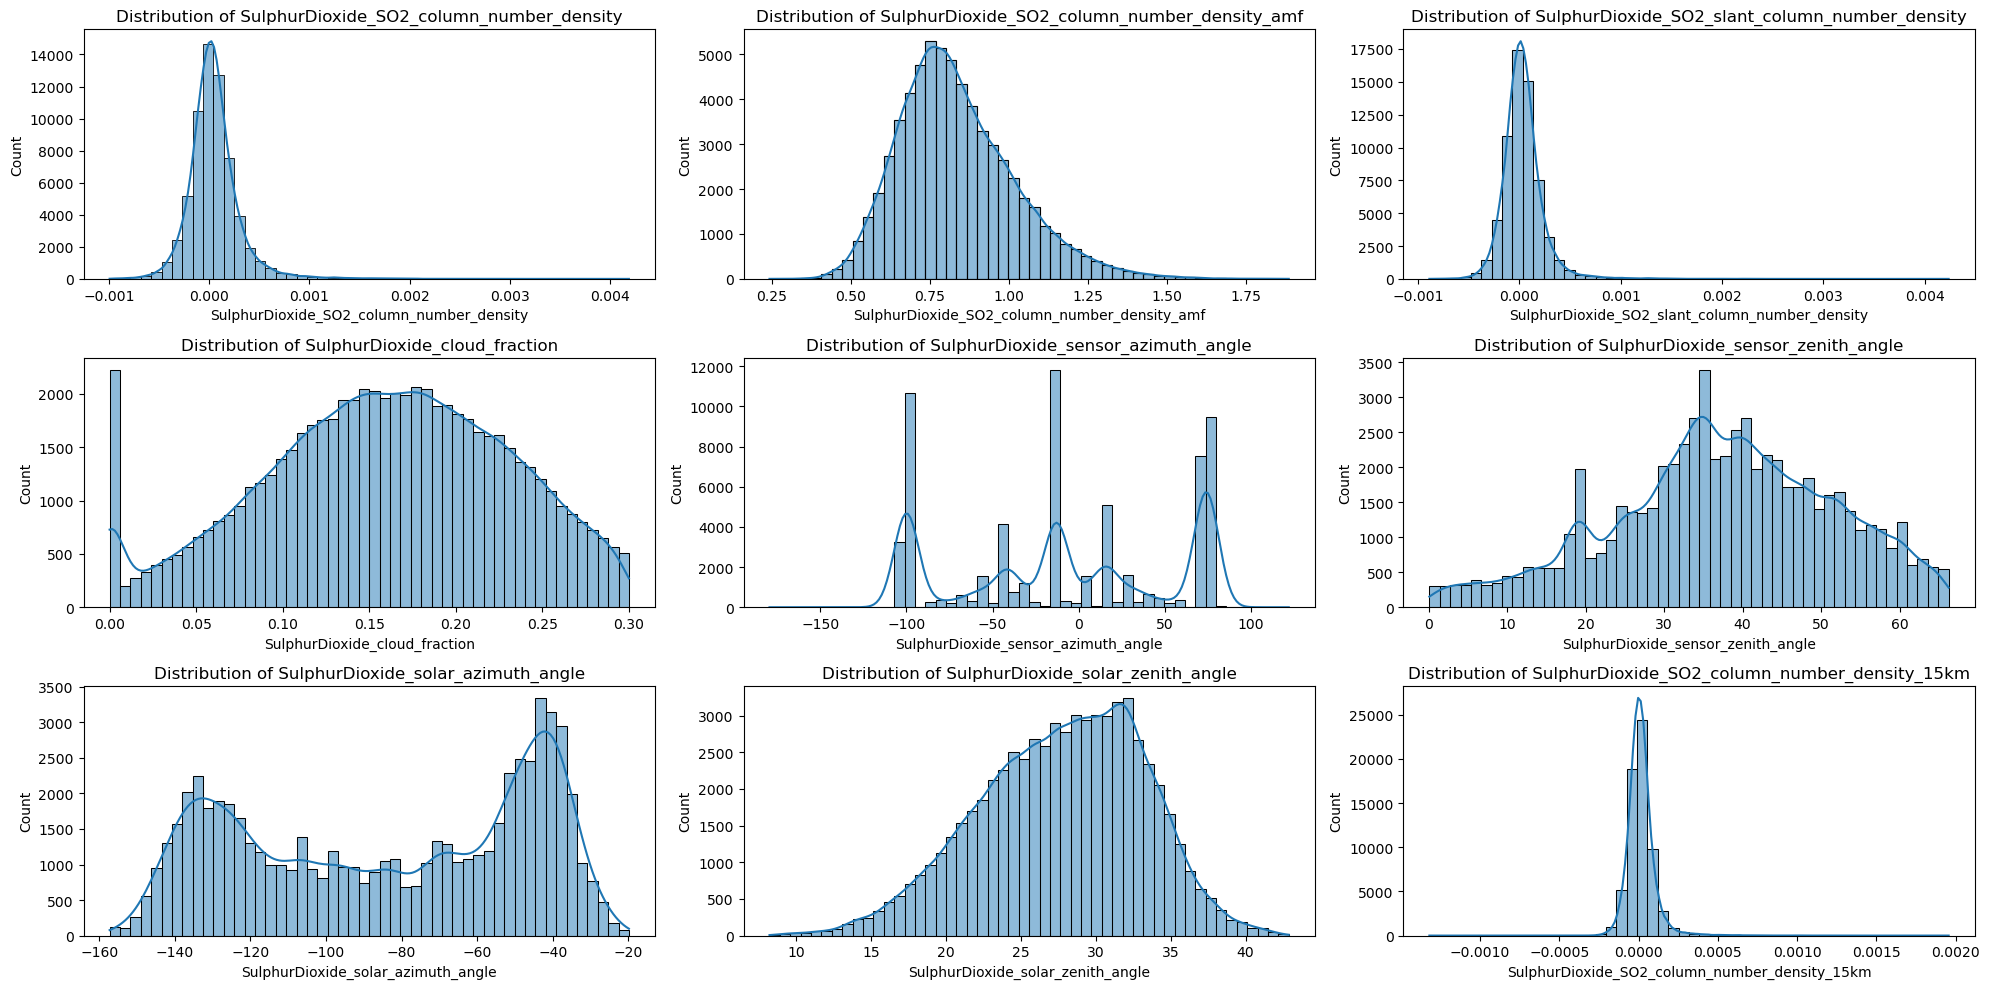

In [12]:
plt.figure(figsize=(20,10))
for index,column in enumerate(train.columns[5:14]):
    plt.subplot(3,3,index+1)
    sns.histplot(train, x=column, bins=50, kde=True)
    plt.xlabel(column)
    plt.title(f"Distribution of {column}")
    plt.tight_layout()

Observations:
* All of the features have somewhat or a normal distribution aside from SulphurDioxide_sensor_azimuth_angle and SulphurDioxide_solar_azimuth_angle.
    * SulphurDioxide_sensor_azimuth_angle has 3 peaks at around -100, 0, and 75.
    * SulphurDioxide_solar_azimuth_angle has 3 peaks at around -135, -84, and -42.
* SulphurDioxide_SO2_column_number_density_amf has a significant peak at around 0.50.
* SulphurDioxide_cloud_fraction has a significant peak at around 0.16.
* SulphurDioxide_sensor_zenith_angle has a significant peak at around 38.
* SulphurDioxide_solar_zenith_angle has a significant peak at around 28.

## Carbon Monoxide

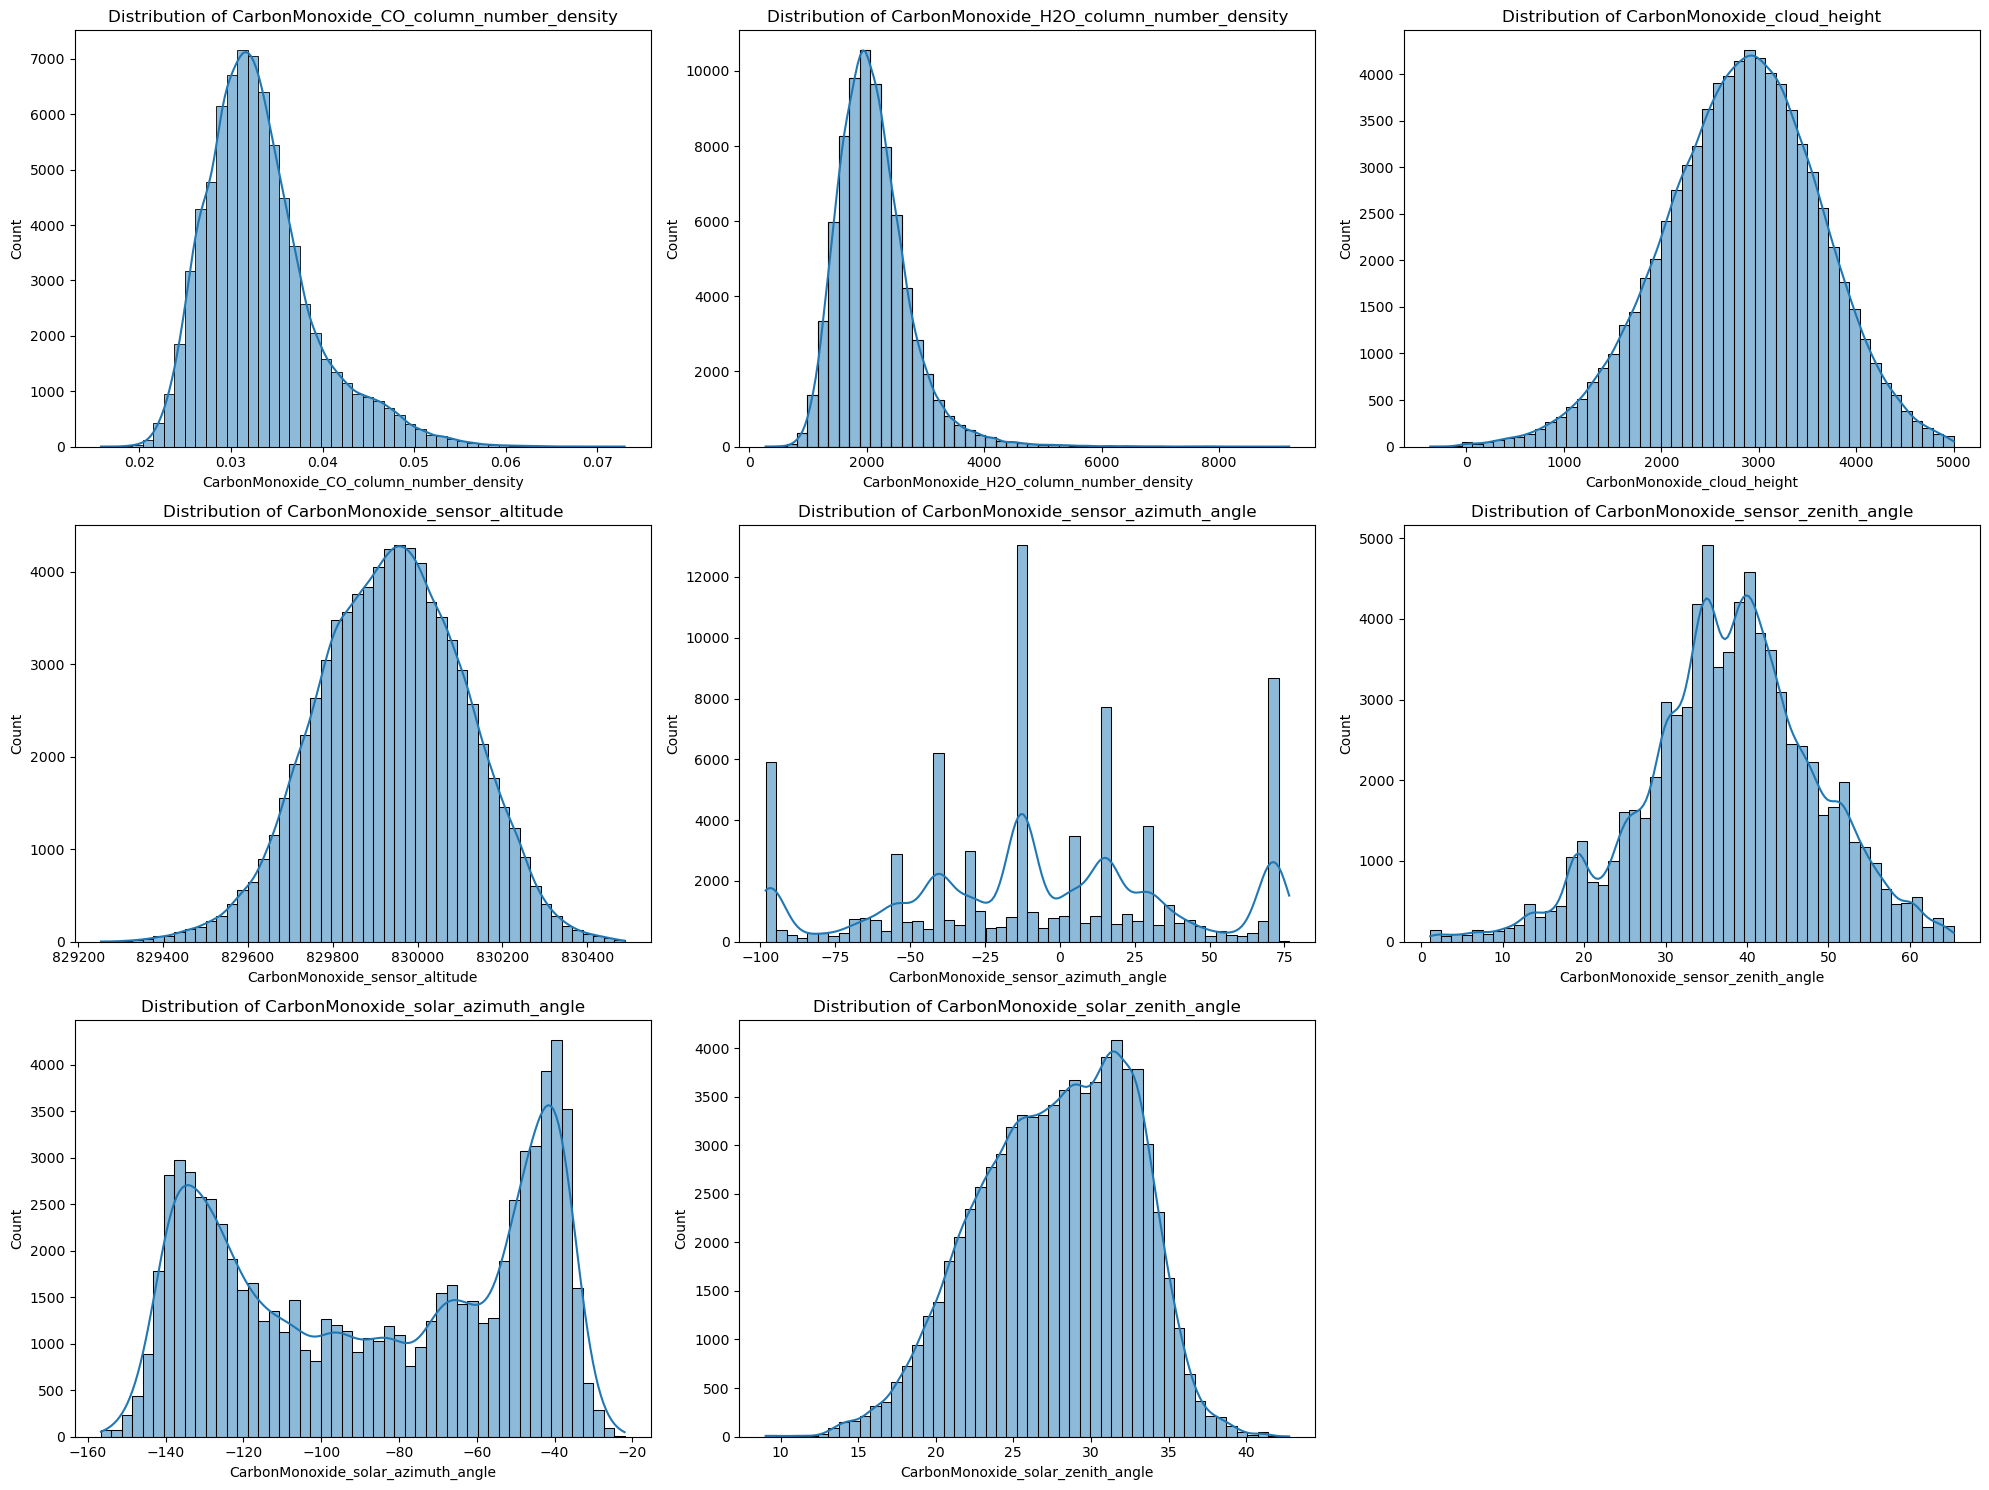

In [13]:
plt.figure(figsize=(20,15))
for index,column in enumerate(train.columns[14:22]):
    plt.subplot(3,3,index+1)
    sns.histplot(train, x=column, bins=50, kde=True)
    plt.xlabel(column)
    plt.title(f"Distribution of {column}")
    plt.tight_layout()

Observations:
*  All of the features have somewhat of a normal distribution aside from CarbonMonoxide_sensor_azimuth_angle and CarbonMonoxide_solar_azimuth_angle.
    * CarbonMonoxide_sensor_azimuth_angle has multiple peaks.
    * CarbonMonoxide_solar_azimuth_angle has 3 peaks at around -140, -84, and -40.
* CarbonMonoxide_cloud_height has a significant peak at around 2900.
* CarbonMonoxide_sensor_altitude has a significant peak at around 829900.
* CarbonMonoxide_solar_zenith_angle has a significant peak at around 27.

## Nitrogen Dioxide

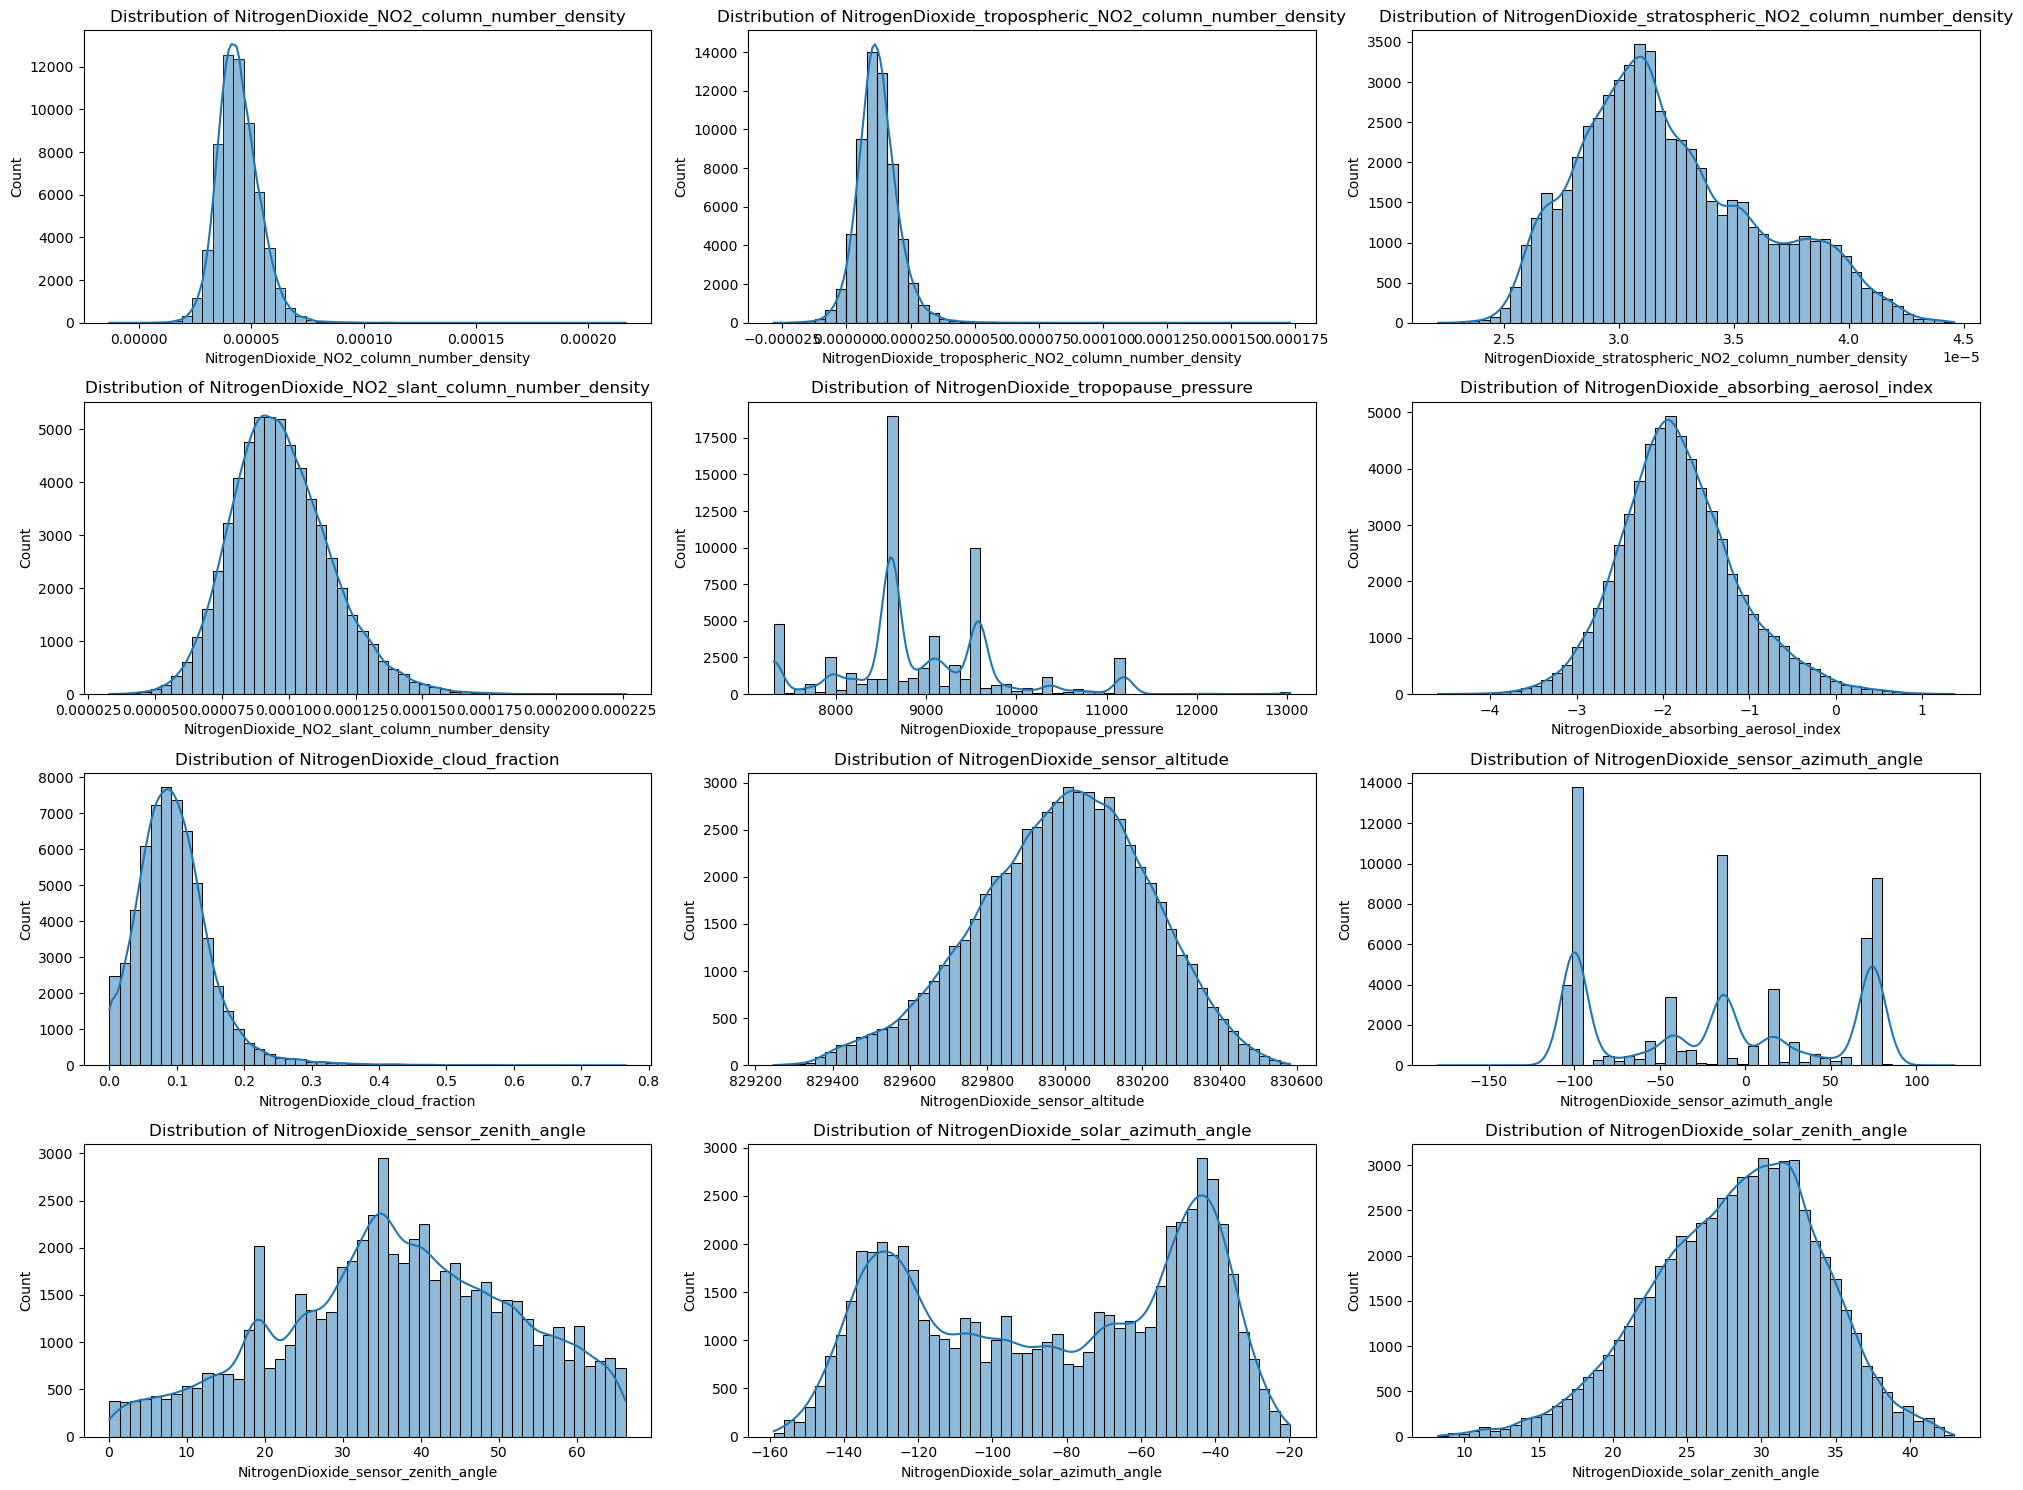

In [14]:
plt.figure(figsize=(20,15))
for index,column in enumerate(train.columns[22:34]):
    plt.subplot(4,3,index+1)
    sns.histplot(train, x=column, bins=50, kde=True)
    plt.xlabel(column)
    plt.title(f"Distribution of {column}")
    plt.tight_layout()

Observations:
* 

## Formaldehyde

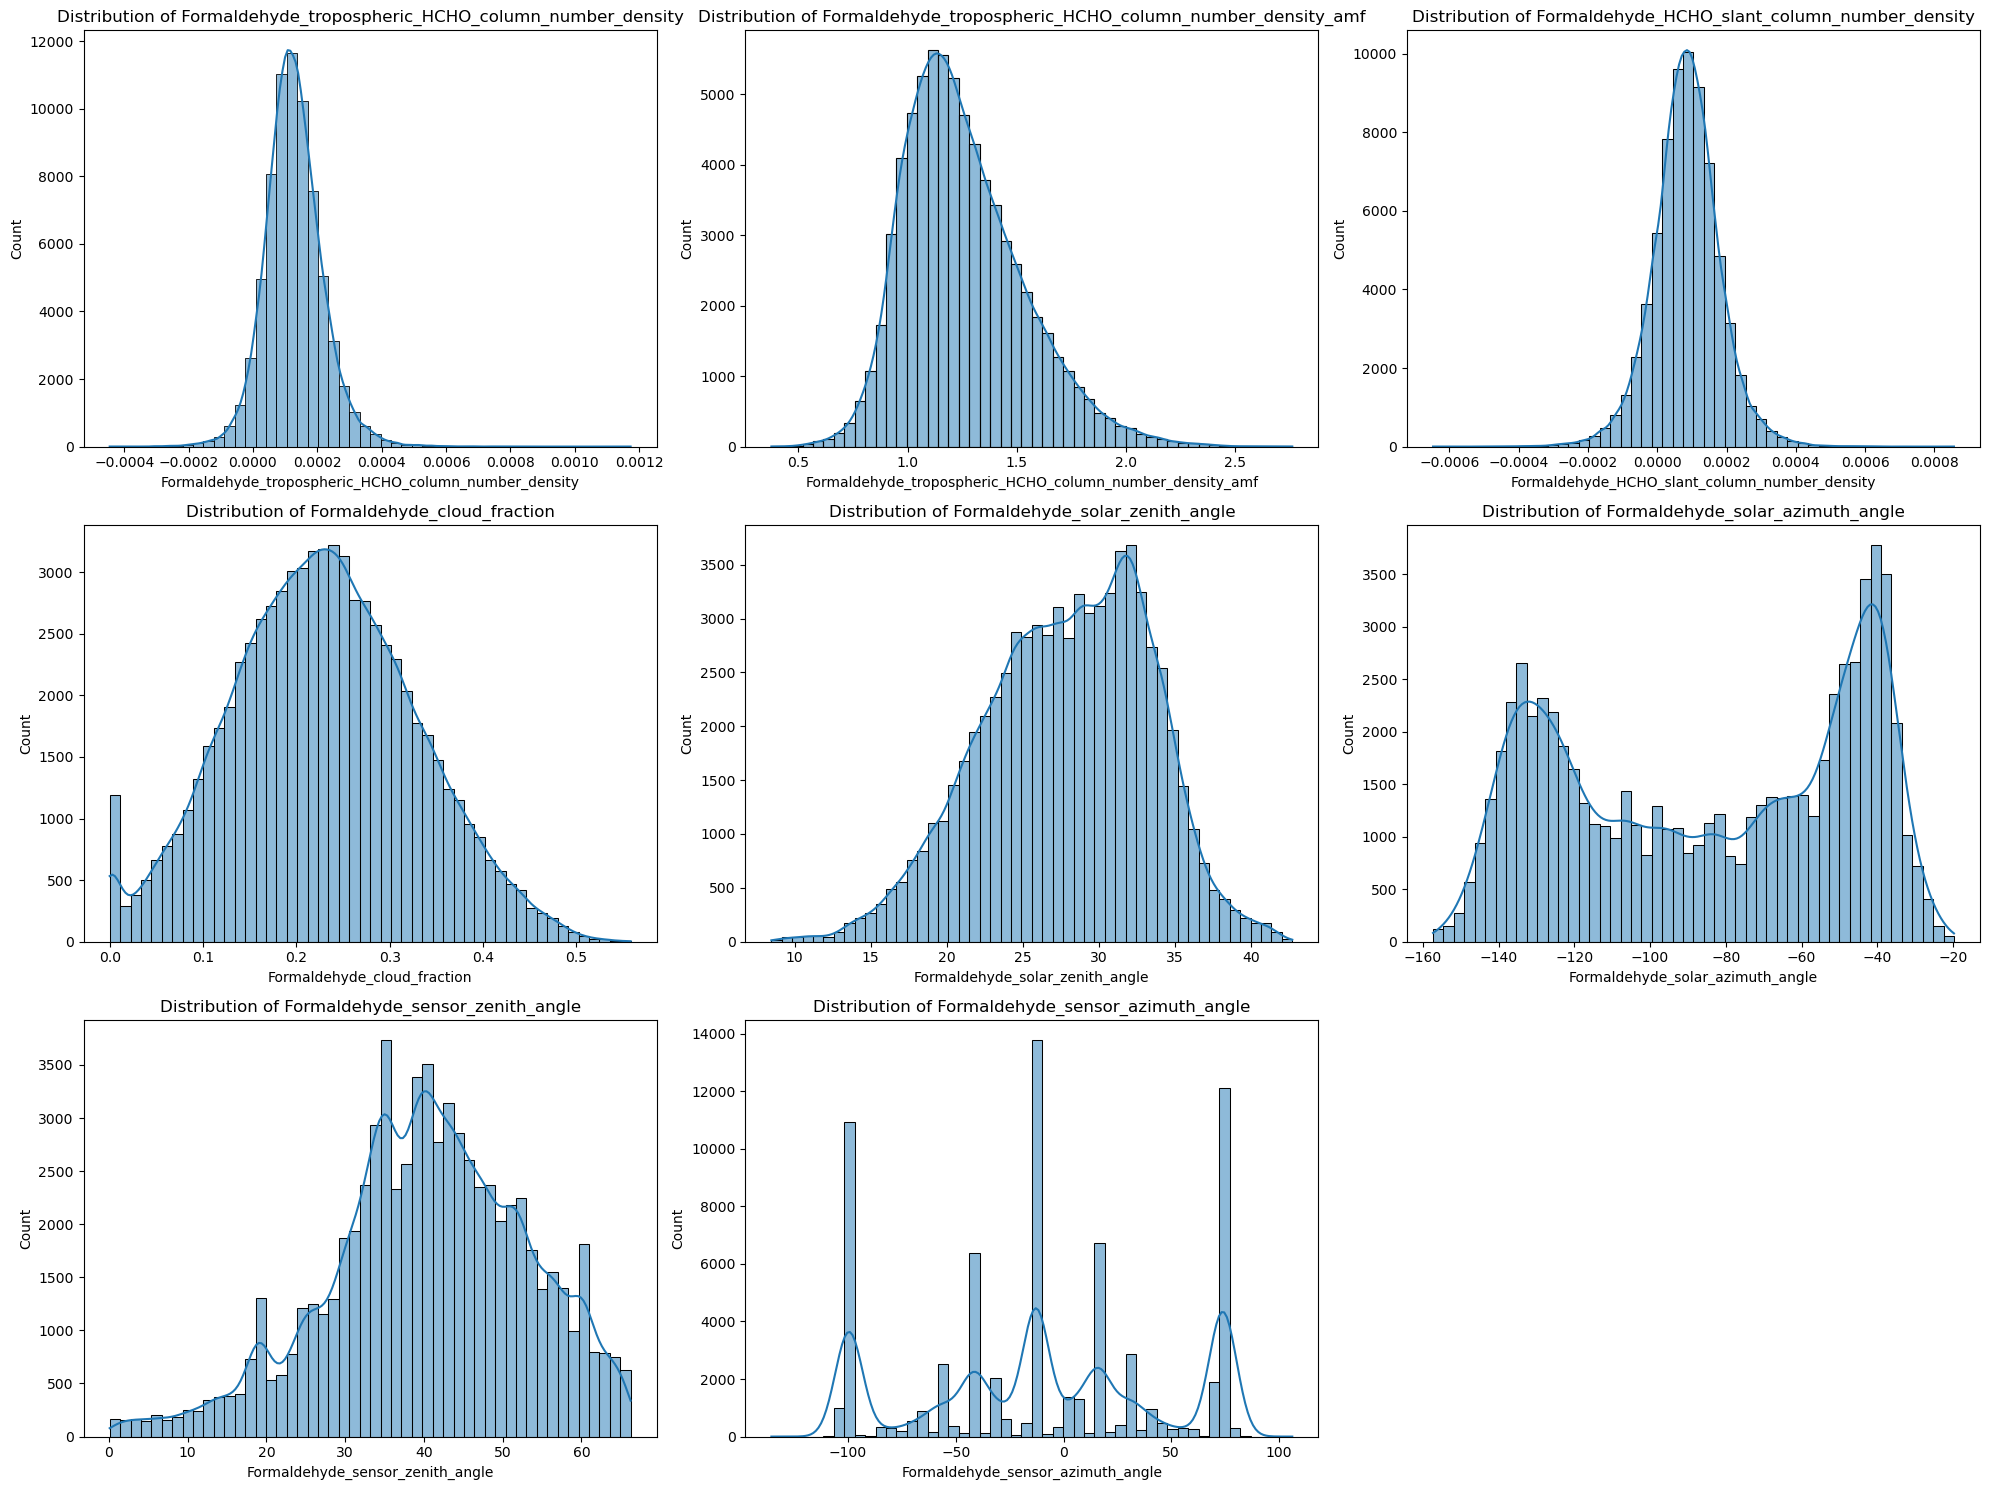

In [15]:
plt.figure(figsize=(20,15))
for index,column in enumerate(train.columns[34:42]):
    plt.subplot(3,3,index+1)
    sns.histplot(train, x=column, bins=50, kde=True)
    plt.xlabel(column)
    plt.title(f"Distribution of {column}")
    plt.tight_layout()

## UV Aerosol Index

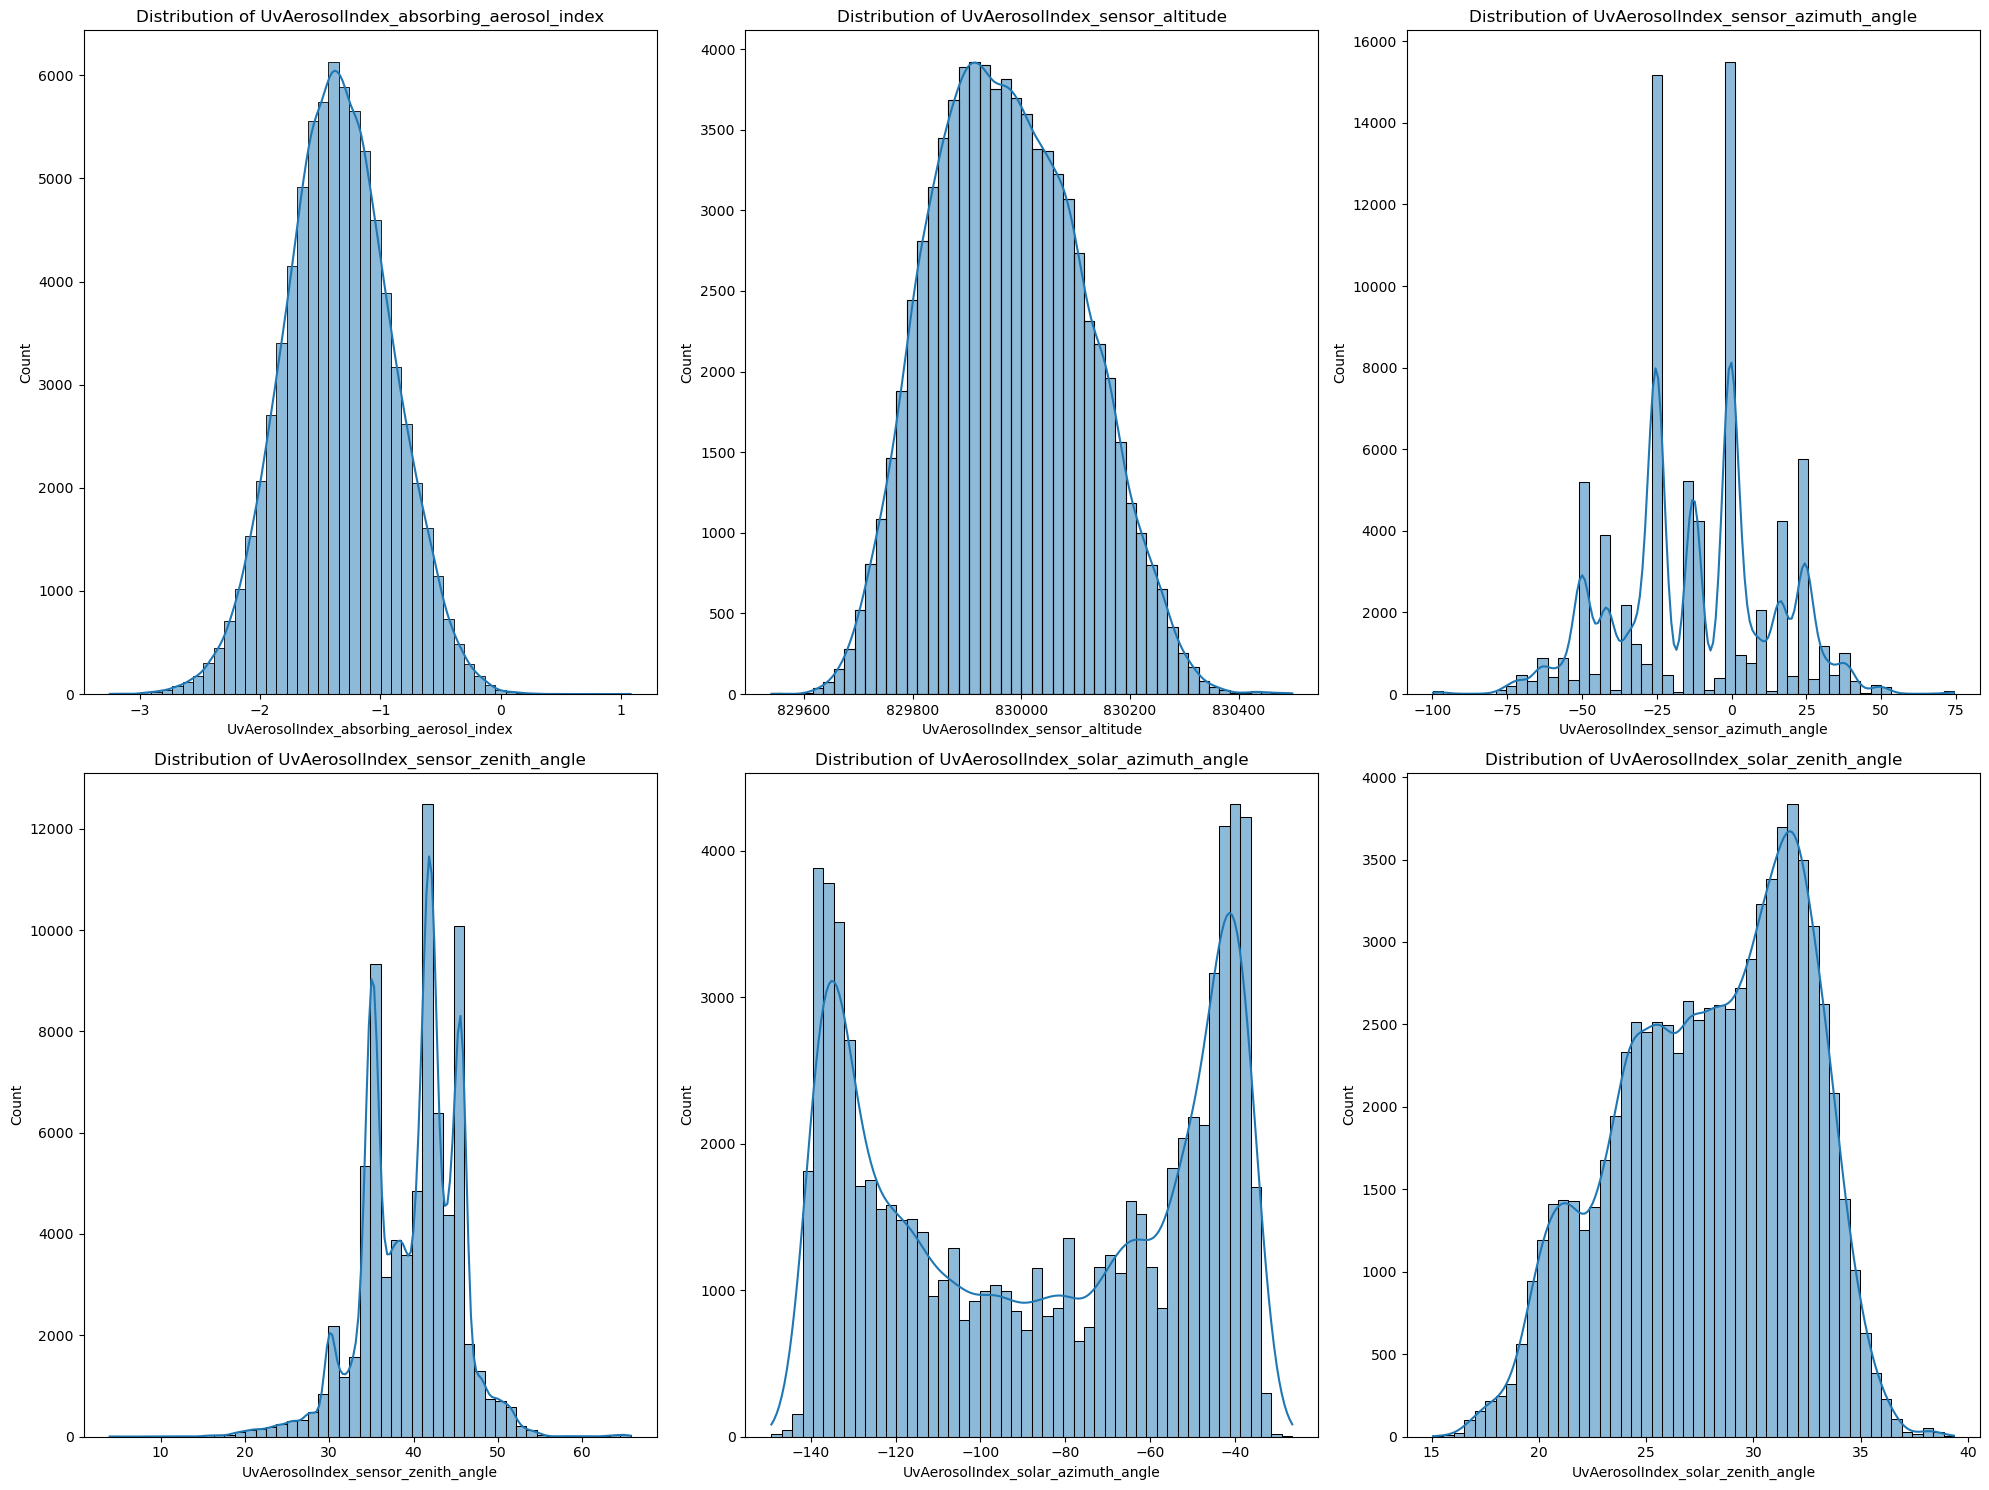

In [16]:
plt.figure(figsize=(20,15))
for index,column in enumerate(train.columns[42:48]):
    plt.subplot(2,3,index+1)
    sns.histplot(train, x=column, bins=50, kde=True)
    plt.xlabel(column)
    plt.title(f"Distribution of {column}")
    plt.tight_layout()

## Ozone

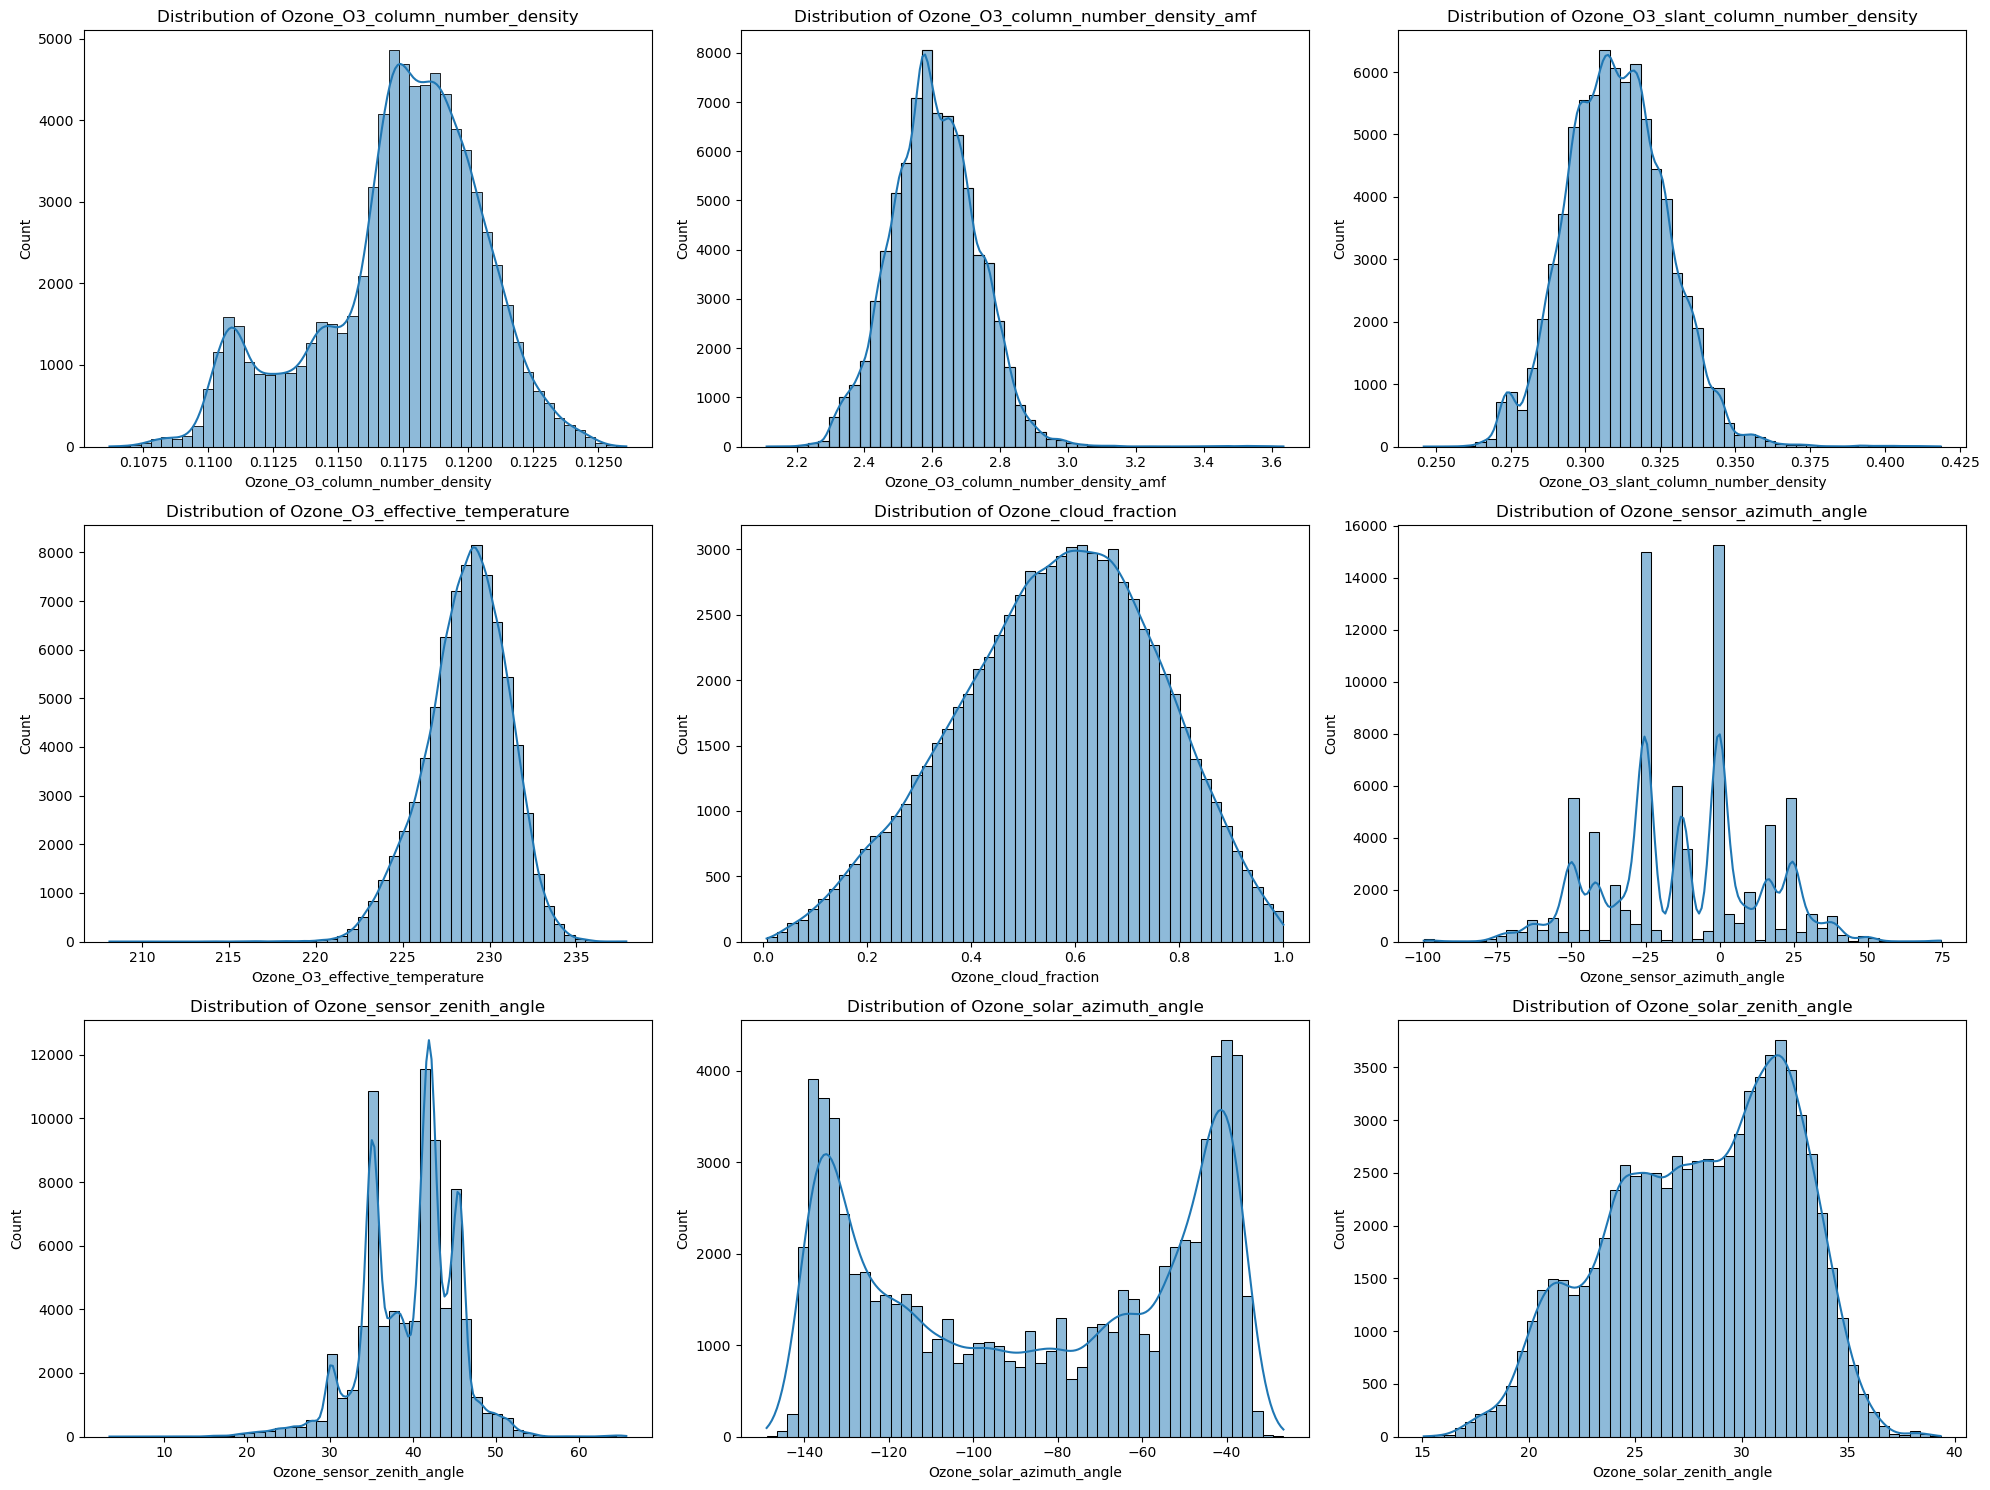

In [17]:
plt.figure(figsize=(20,15))
for index,column in enumerate(train.columns[48:57]):
    plt.subplot(3,3,index+1)
    sns.histplot(train, x=column, bins=50, kde=True)
    plt.xlabel(column)
    plt.title(f"Distribution of {column}")
    plt.tight_layout()

## Cloud

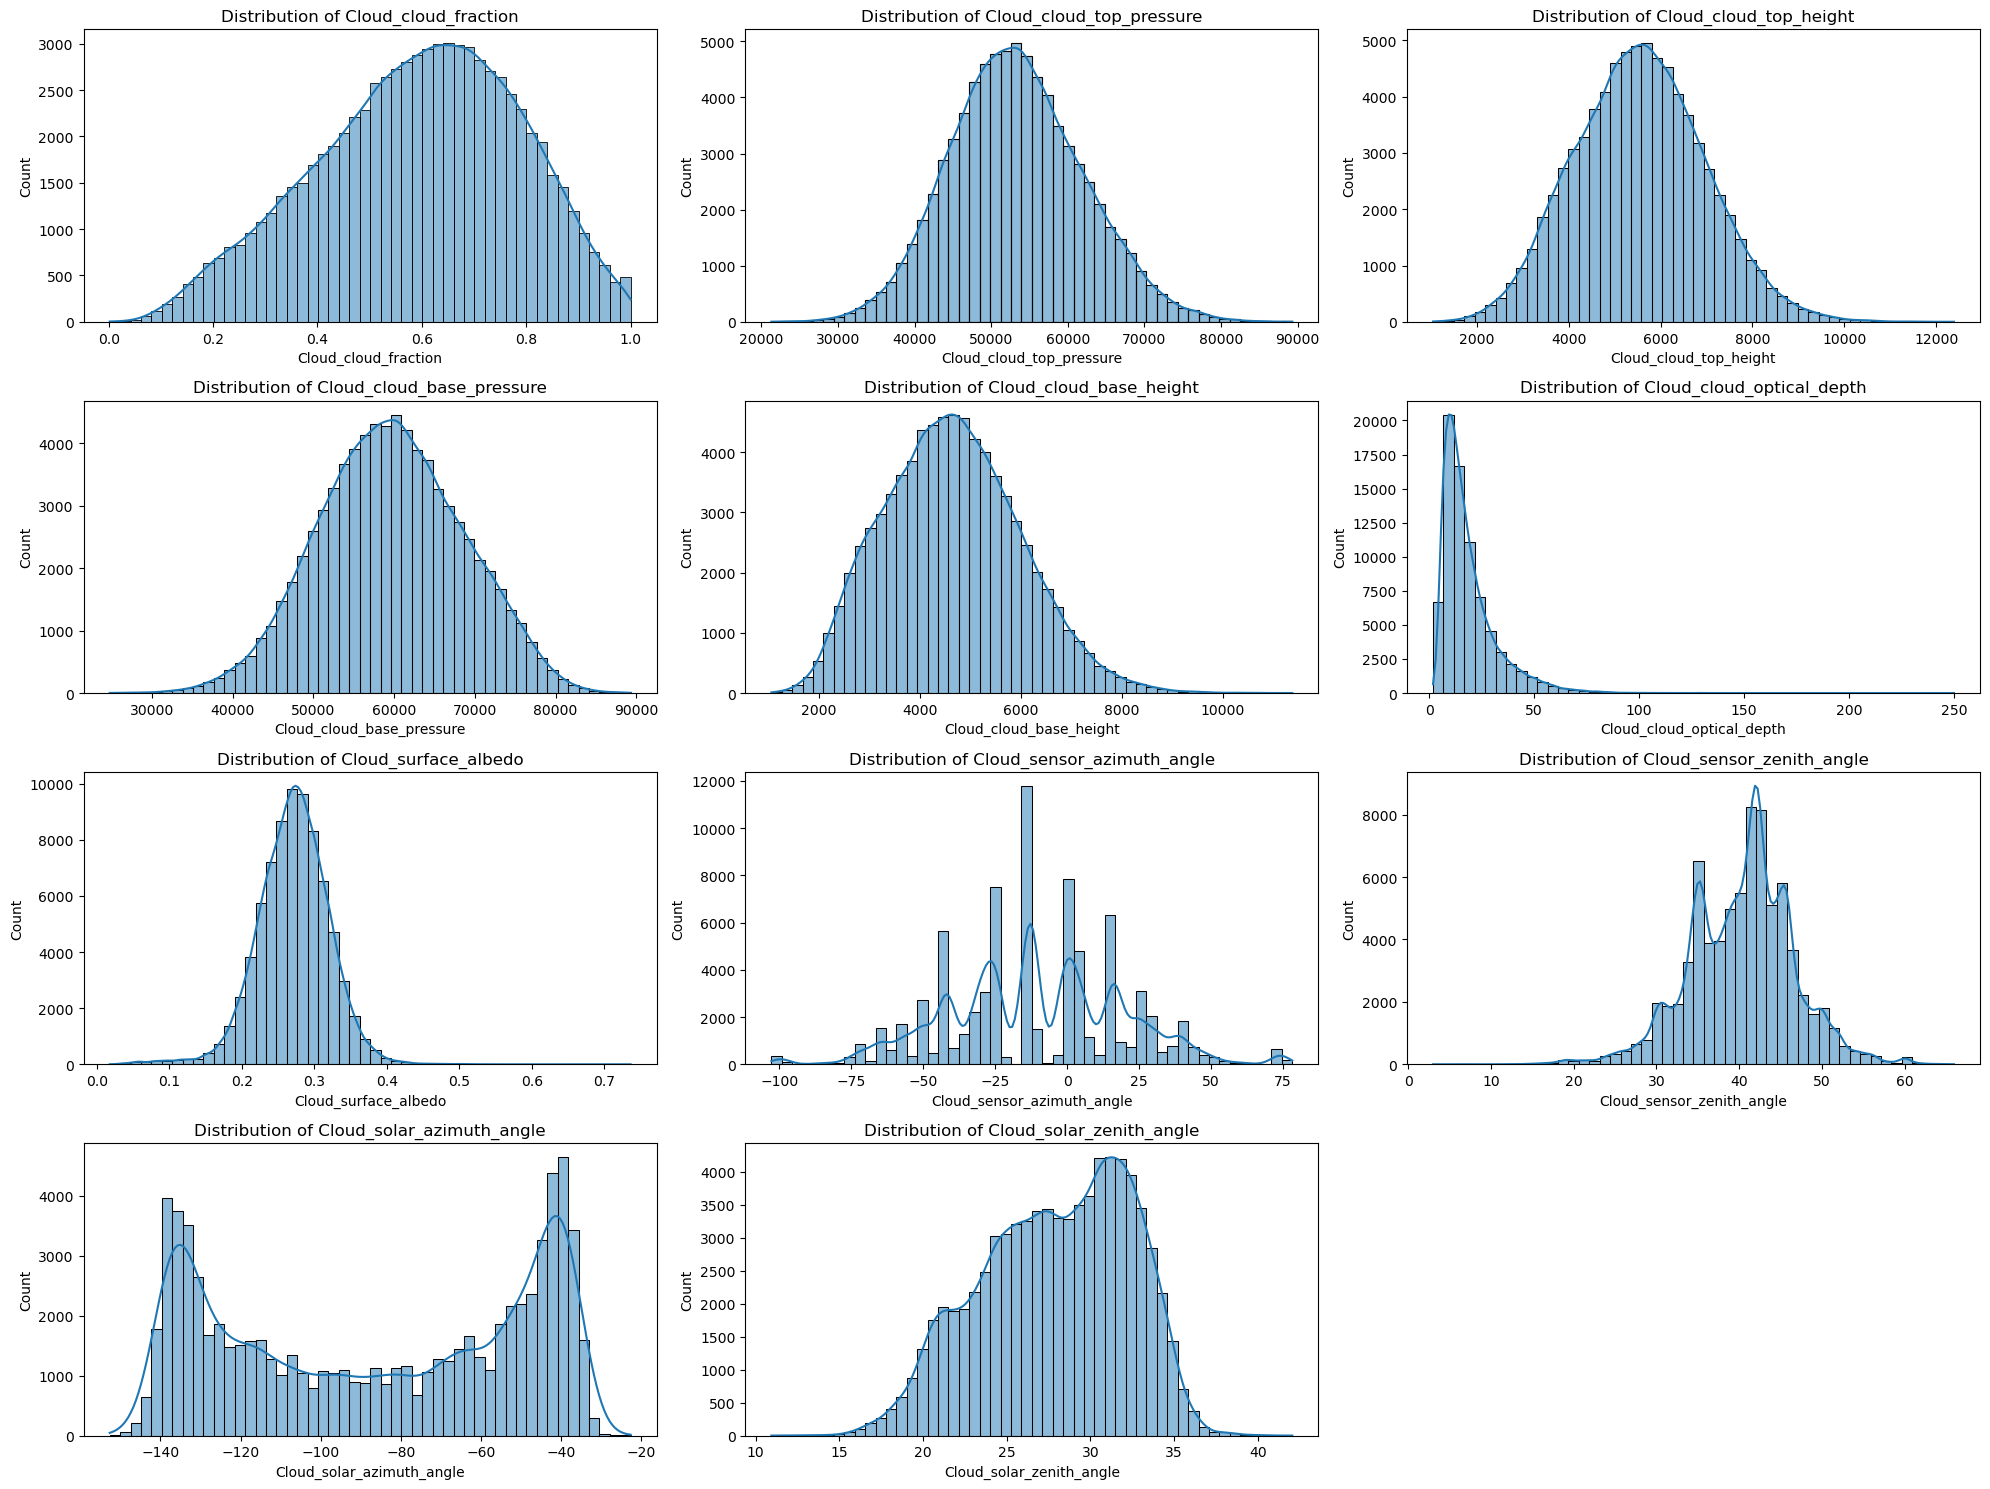

In [18]:
plt.figure(figsize=(20,15))
for index,column in enumerate(train.columns[57:68]):
    plt.subplot(4,3,index+1)
    sns.histplot(train, x=column, bins=50, kde=True)
    plt.xlabel(column)
    plt.title(f"Distribution of {column}")
    plt.tight_layout()

# Bivariate Analysis
## Year and Week No.

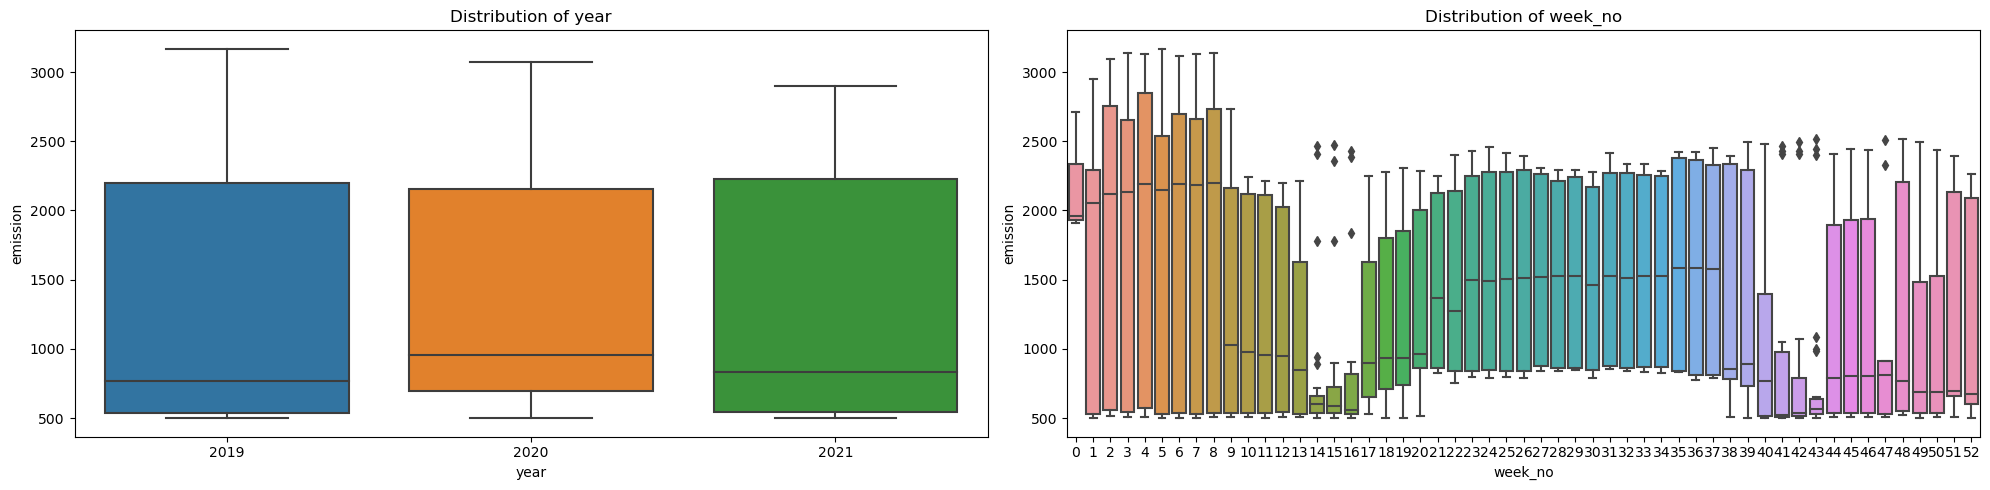

In [19]:
plt.figure(figsize=(20,5))
for index,column in enumerate(train.columns[3:5]):
    plt.subplot(1,2,index+1)
    sns.boxplot(train[train['emission'] > 500], x=column, y='emission')
    plt.xlabel(column)
    plt.title(f"Distribution of {column}")
    plt.tight_layout()

## Sulphur Dioxide

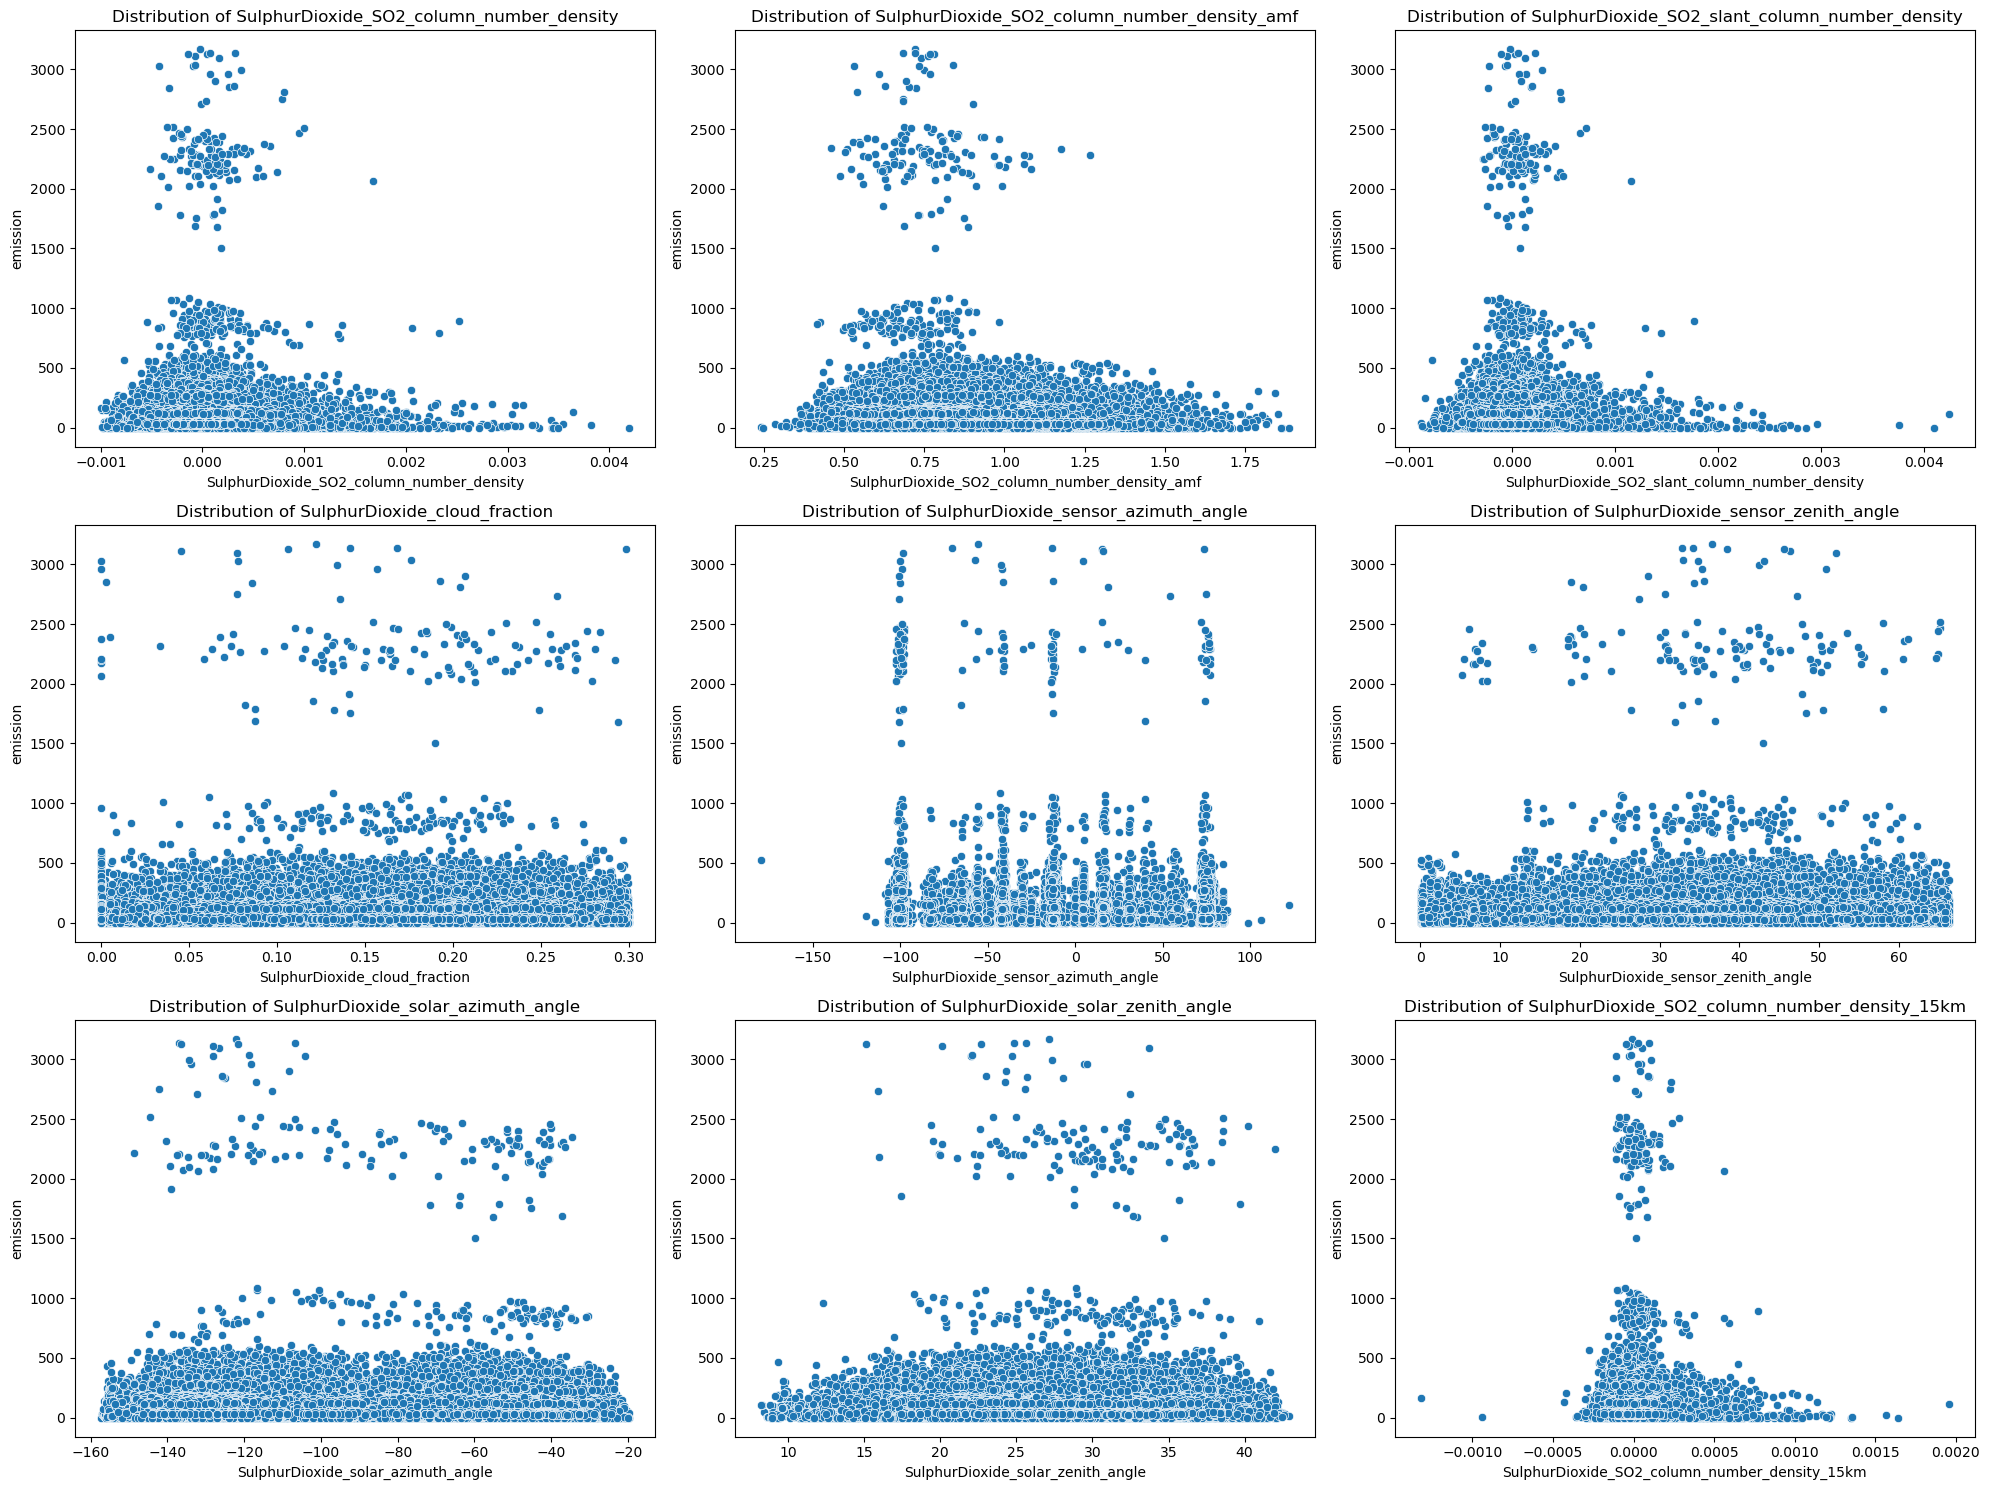

In [20]:
plt.figure(figsize=(20,15))
for index,column in enumerate(train.columns[5:14]):
    plt.subplot(3,3,index+1)
    sns.scatterplot(train, x=column, y='emission')
    plt.xlabel(column)
    plt.title(f"Distribution of {column}")
    plt.tight_layout()

## Carbon Monoxide

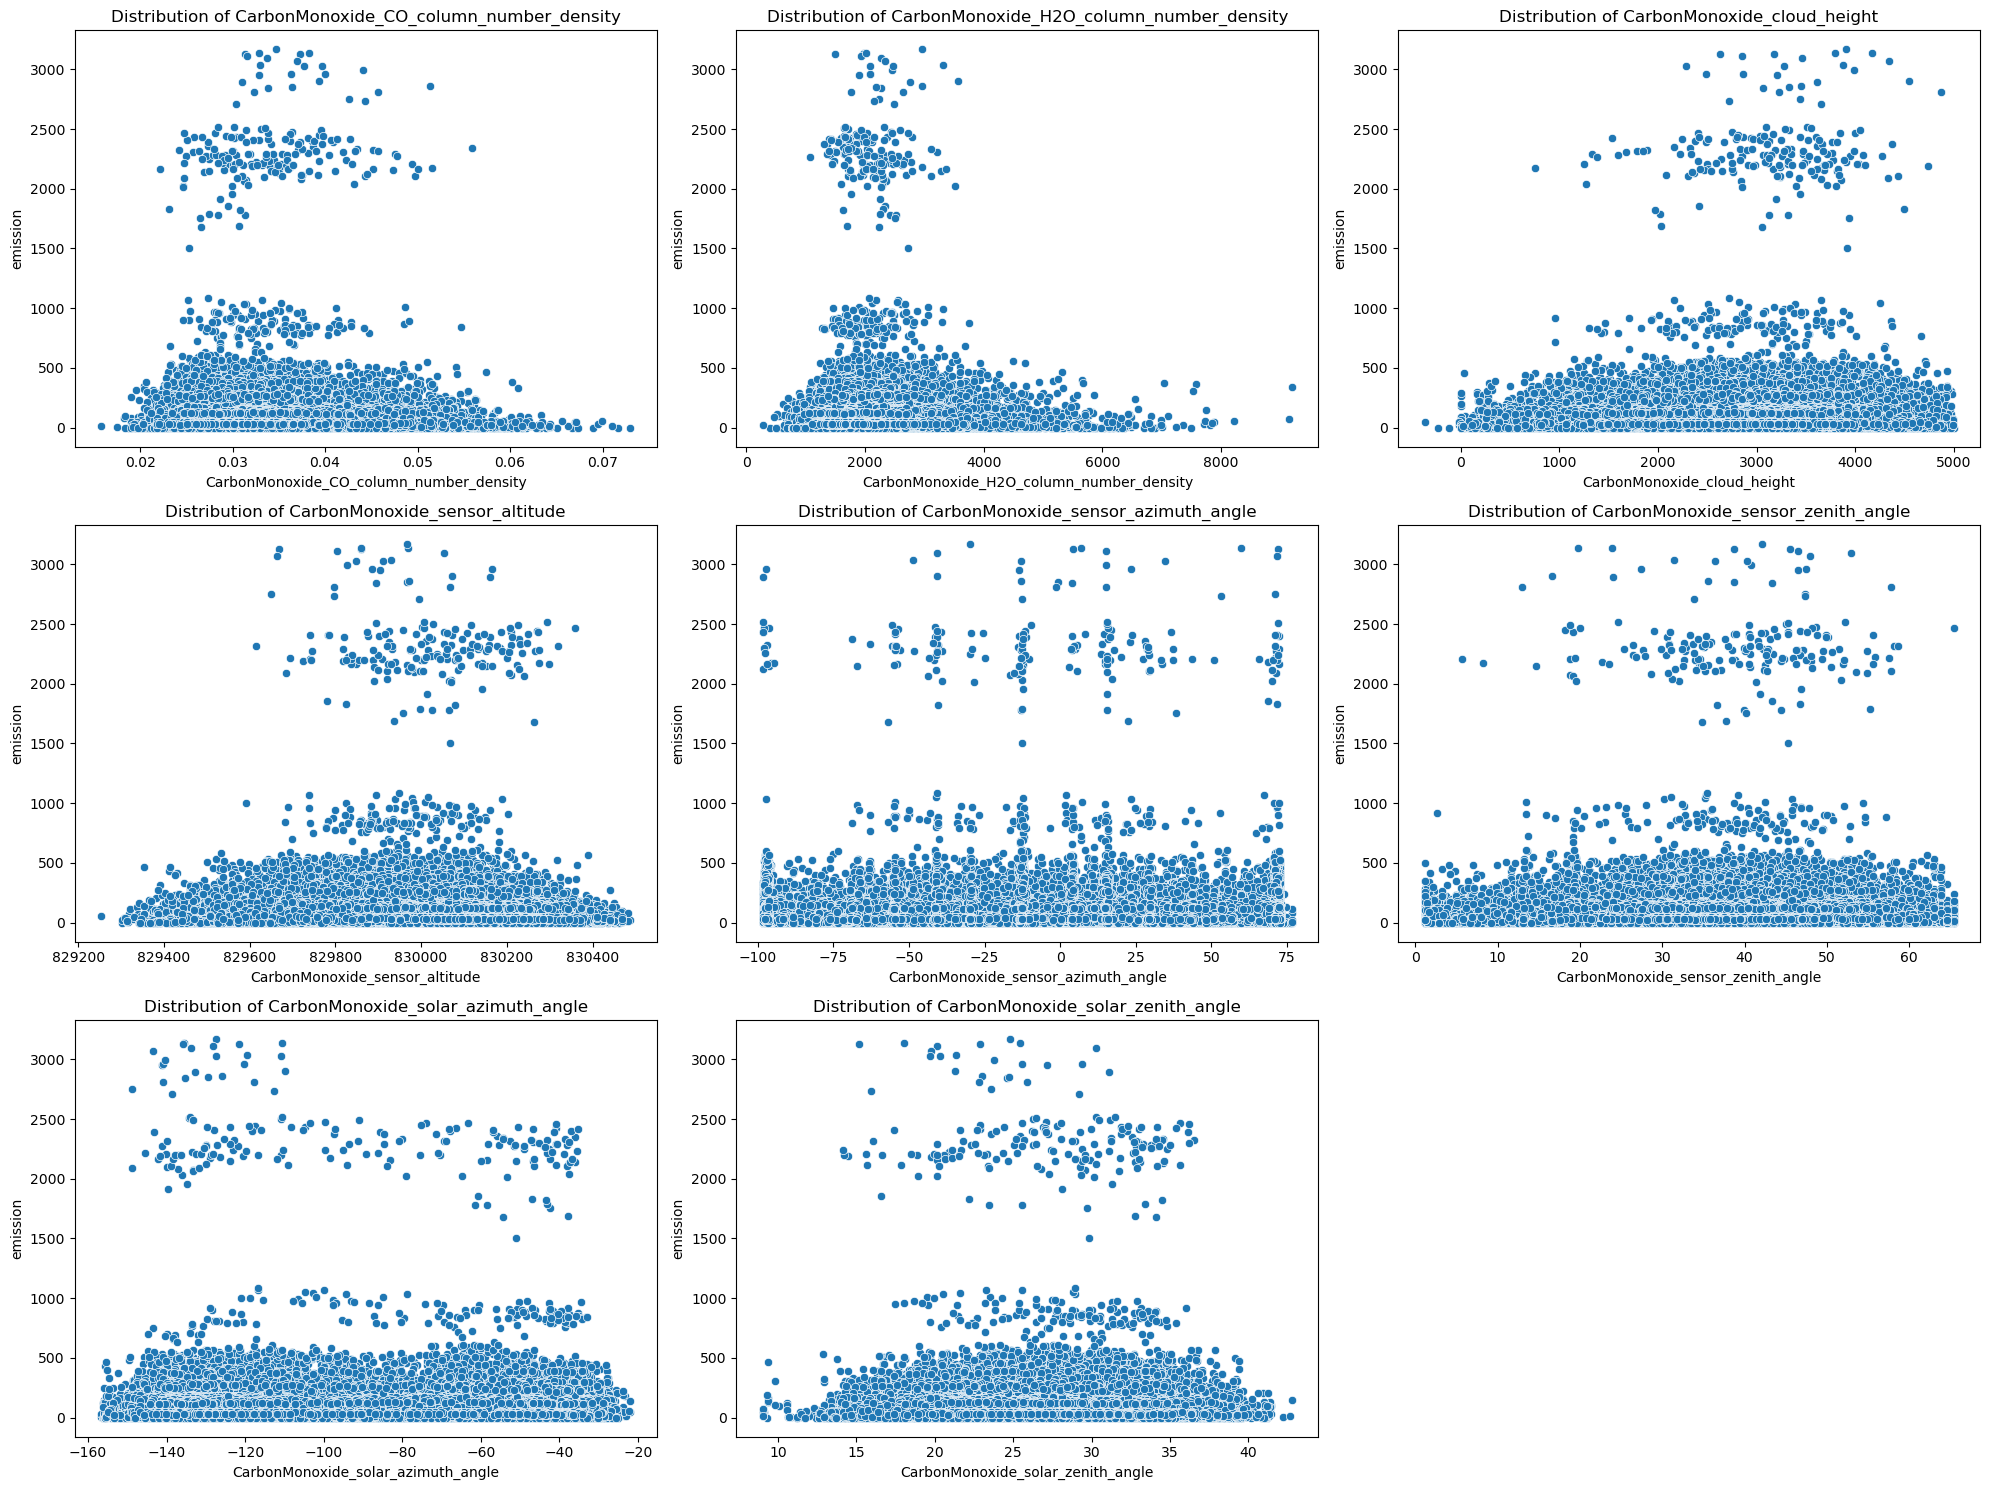

In [21]:
plt.figure(figsize=(20,15))
for index,column in enumerate(train.columns[14:22]):
    plt.subplot(3,3,index+1)
    sns.scatterplot(train, x=column, y='emission')
    plt.xlabel(column)
    plt.title(f"Distribution of {column}")
    plt.tight_layout()

## Nitrogen Dioxide

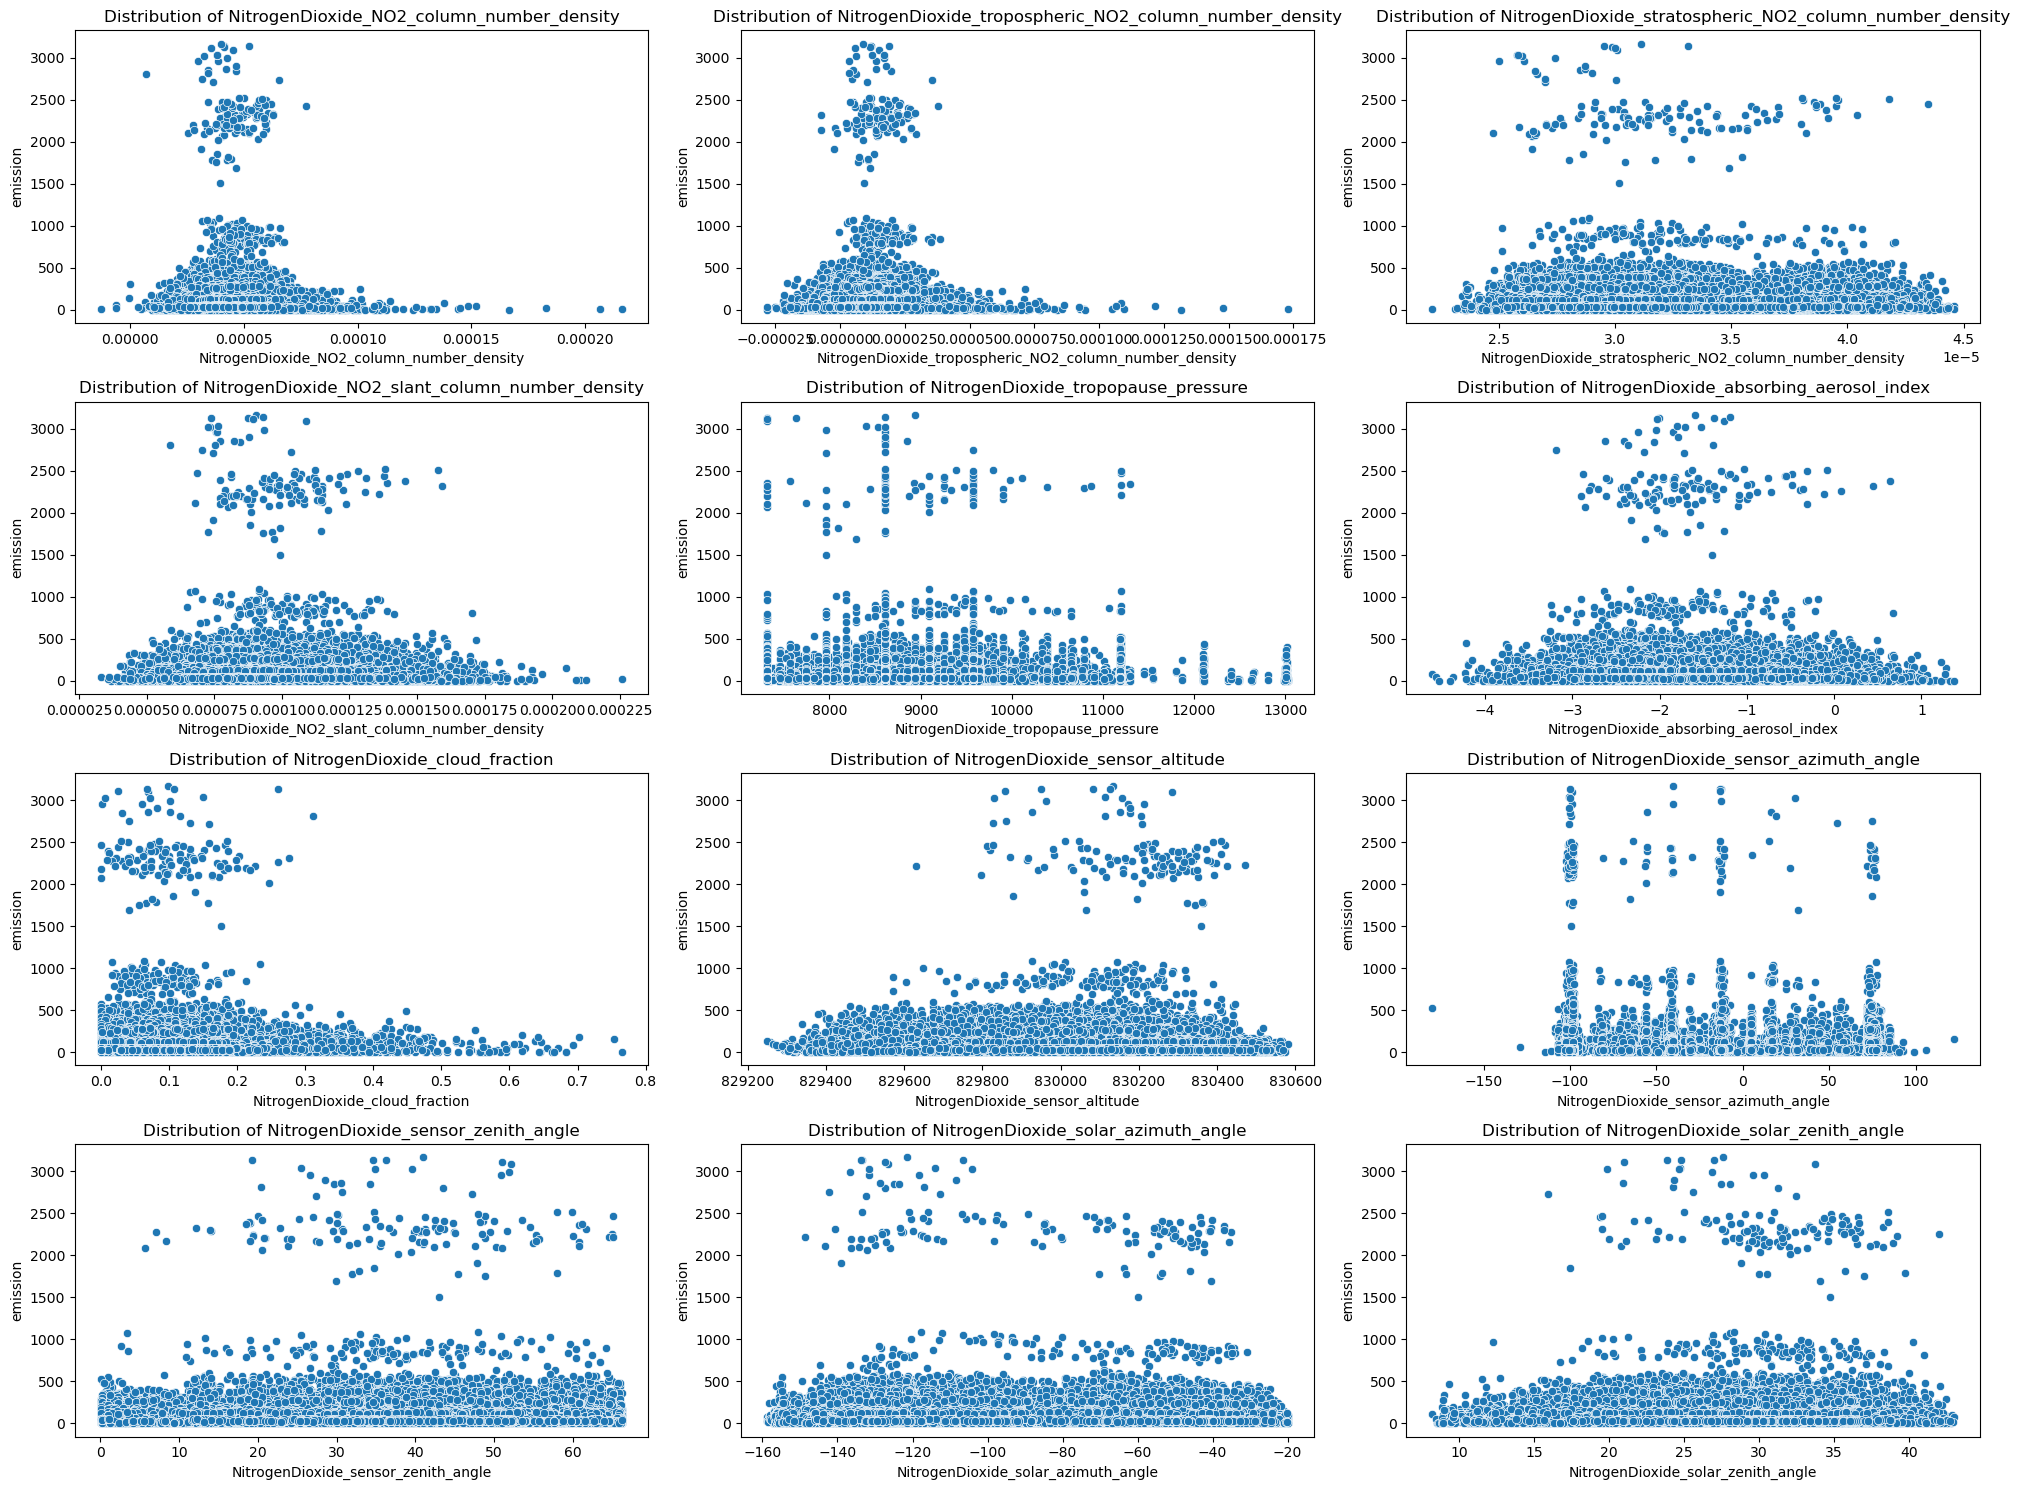

In [22]:
plt.figure(figsize=(20,15))
for index,column in enumerate(train.columns[22:34]):
    plt.subplot(4,3,index+1)
    sns.scatterplot(train, x=column, y='emission')
    plt.xlabel(column)
    plt.title(f"Distribution of {column}")
    plt.tight_layout()

## Formaldehyde

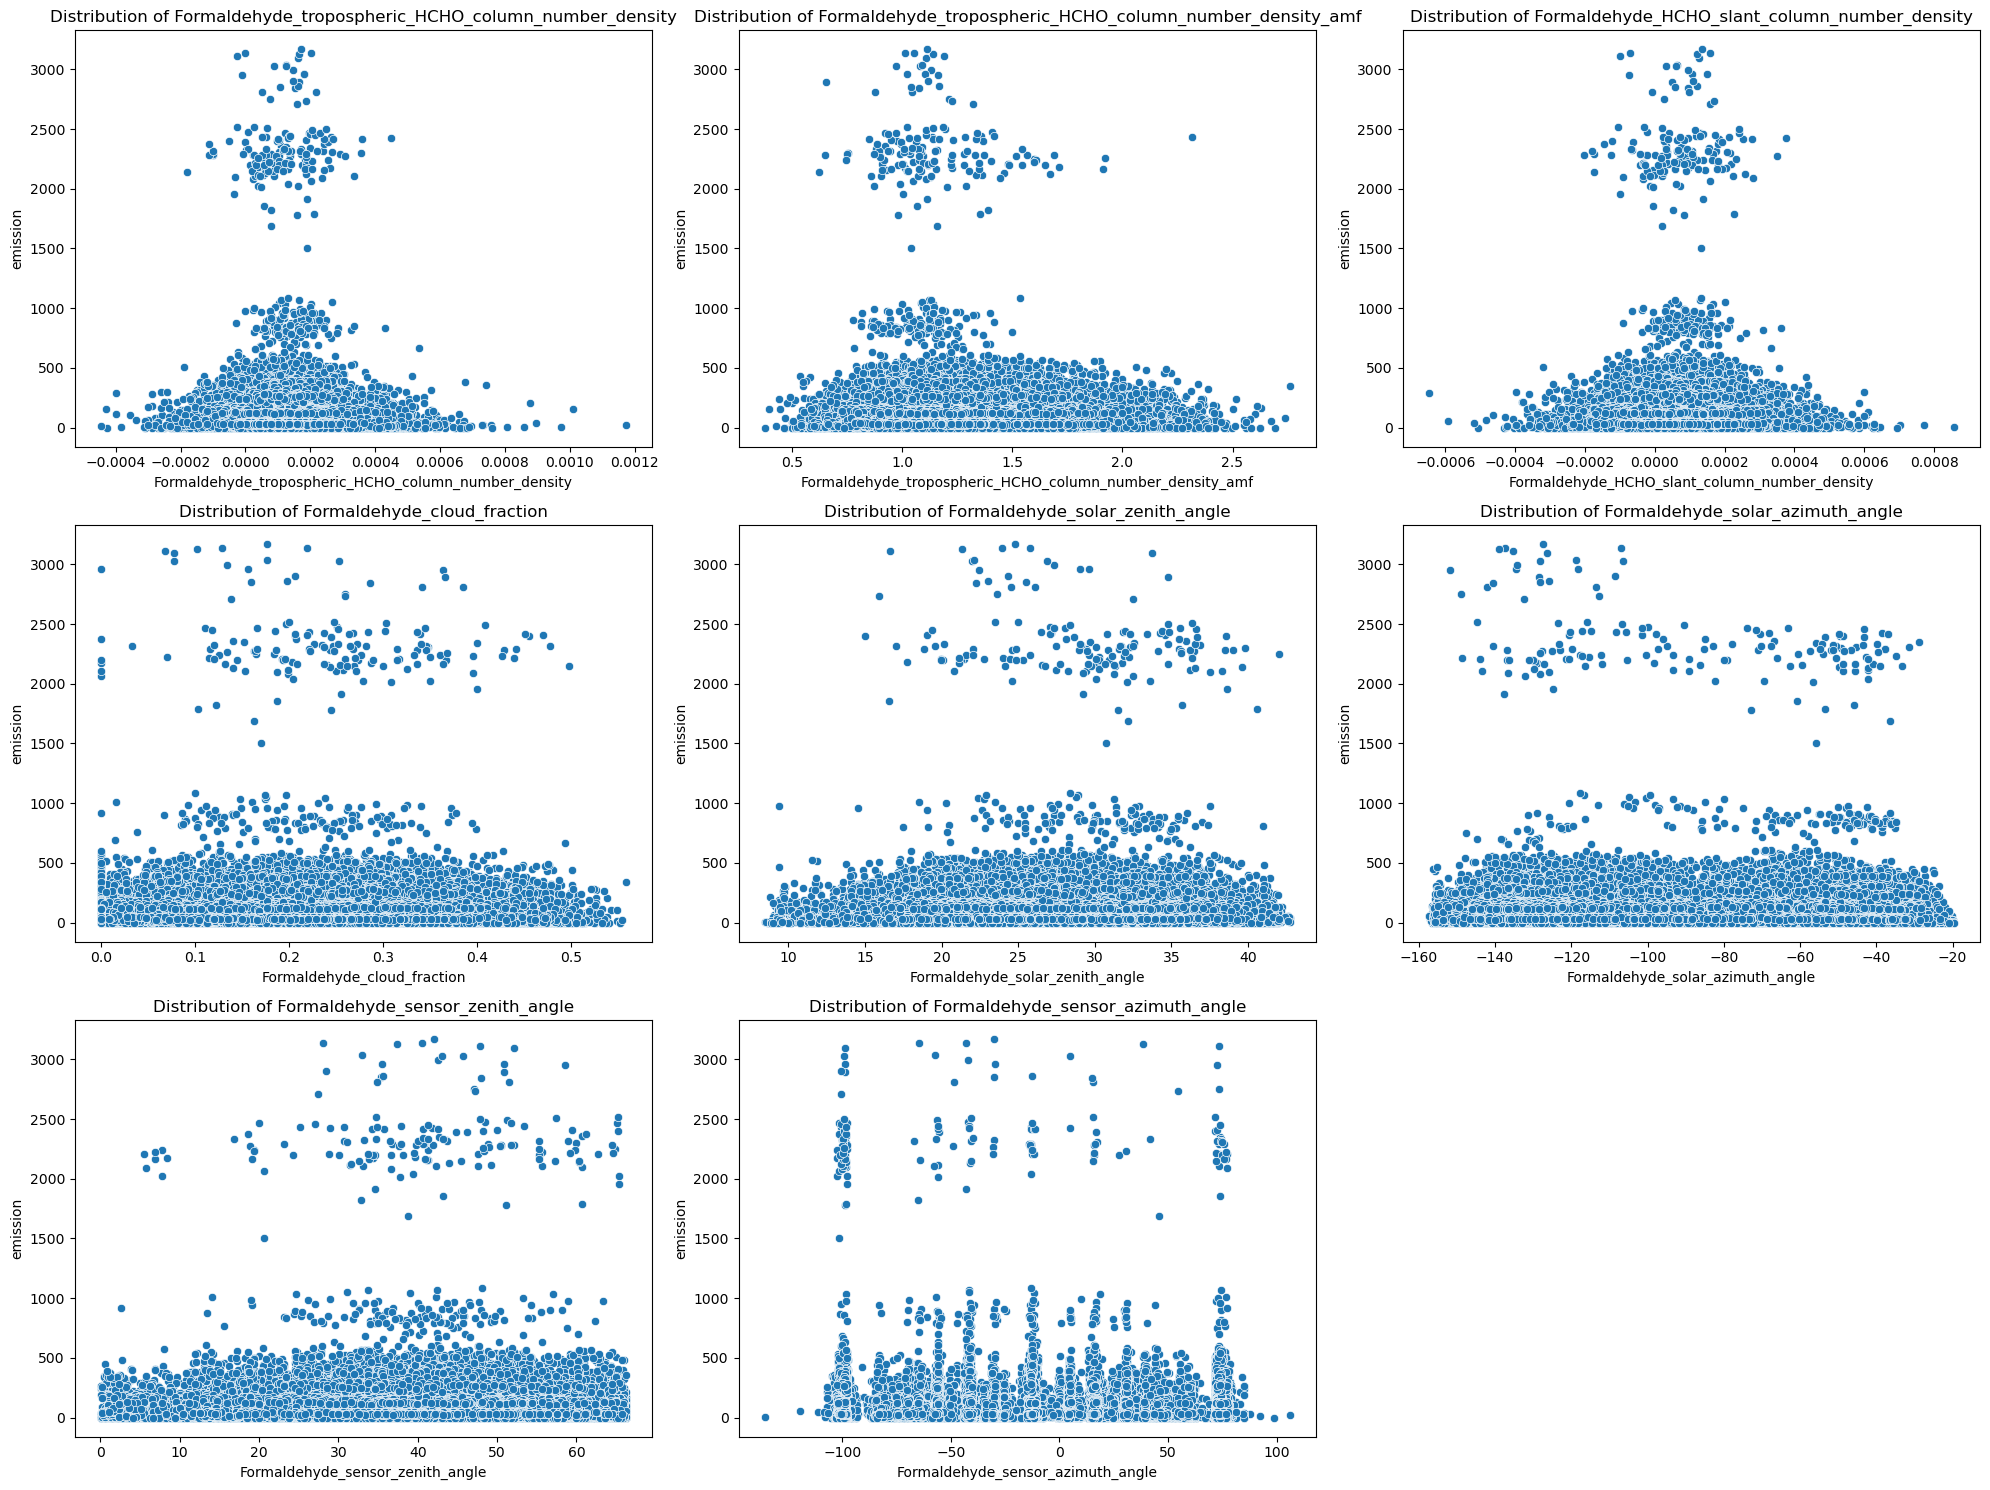

In [23]:
plt.figure(figsize=(20,15))
for index,column in enumerate(train.columns[34:42]):
    plt.subplot(3,3,index+1)
    sns.scatterplot(train, x=column, y='emission')
    plt.xlabel(column)
    plt.title(f"Distribution of {column}")
    plt.tight_layout()

## UV Aerosol Index

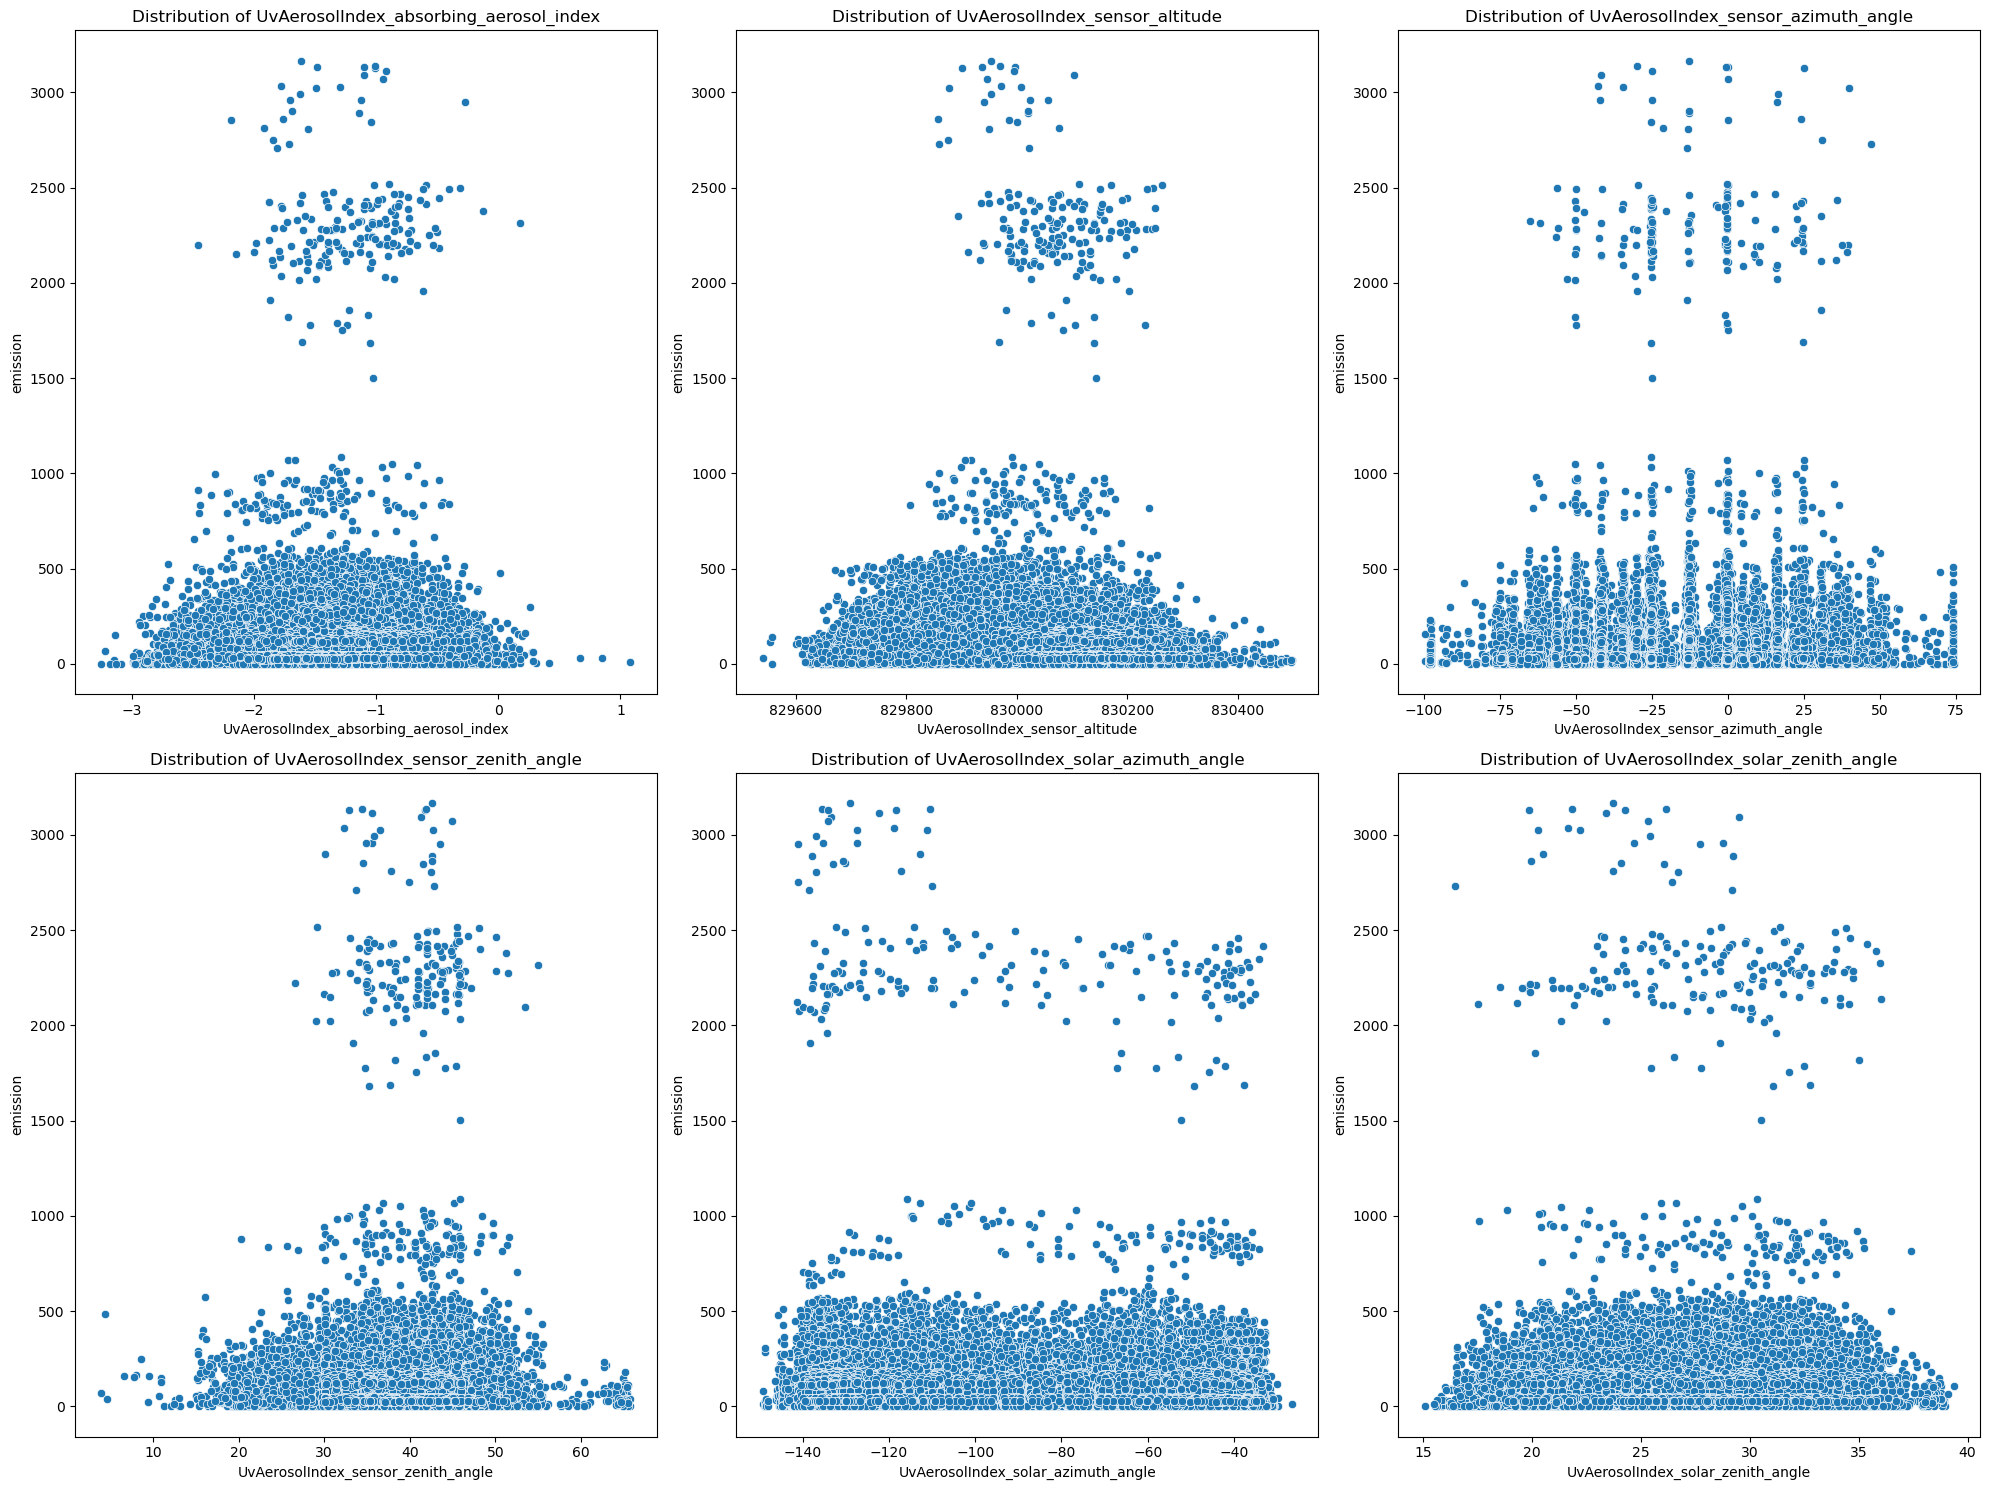

In [24]:
plt.figure(figsize=(20,15))
for index,column in enumerate(train.columns[42:48]):
    plt.subplot(2,3,index+1)
    sns.scatterplot(train, x=column, y='emission')
    plt.xlabel(column)
    plt.title(f"Distribution of {column}")
    plt.tight_layout()

## Ozone

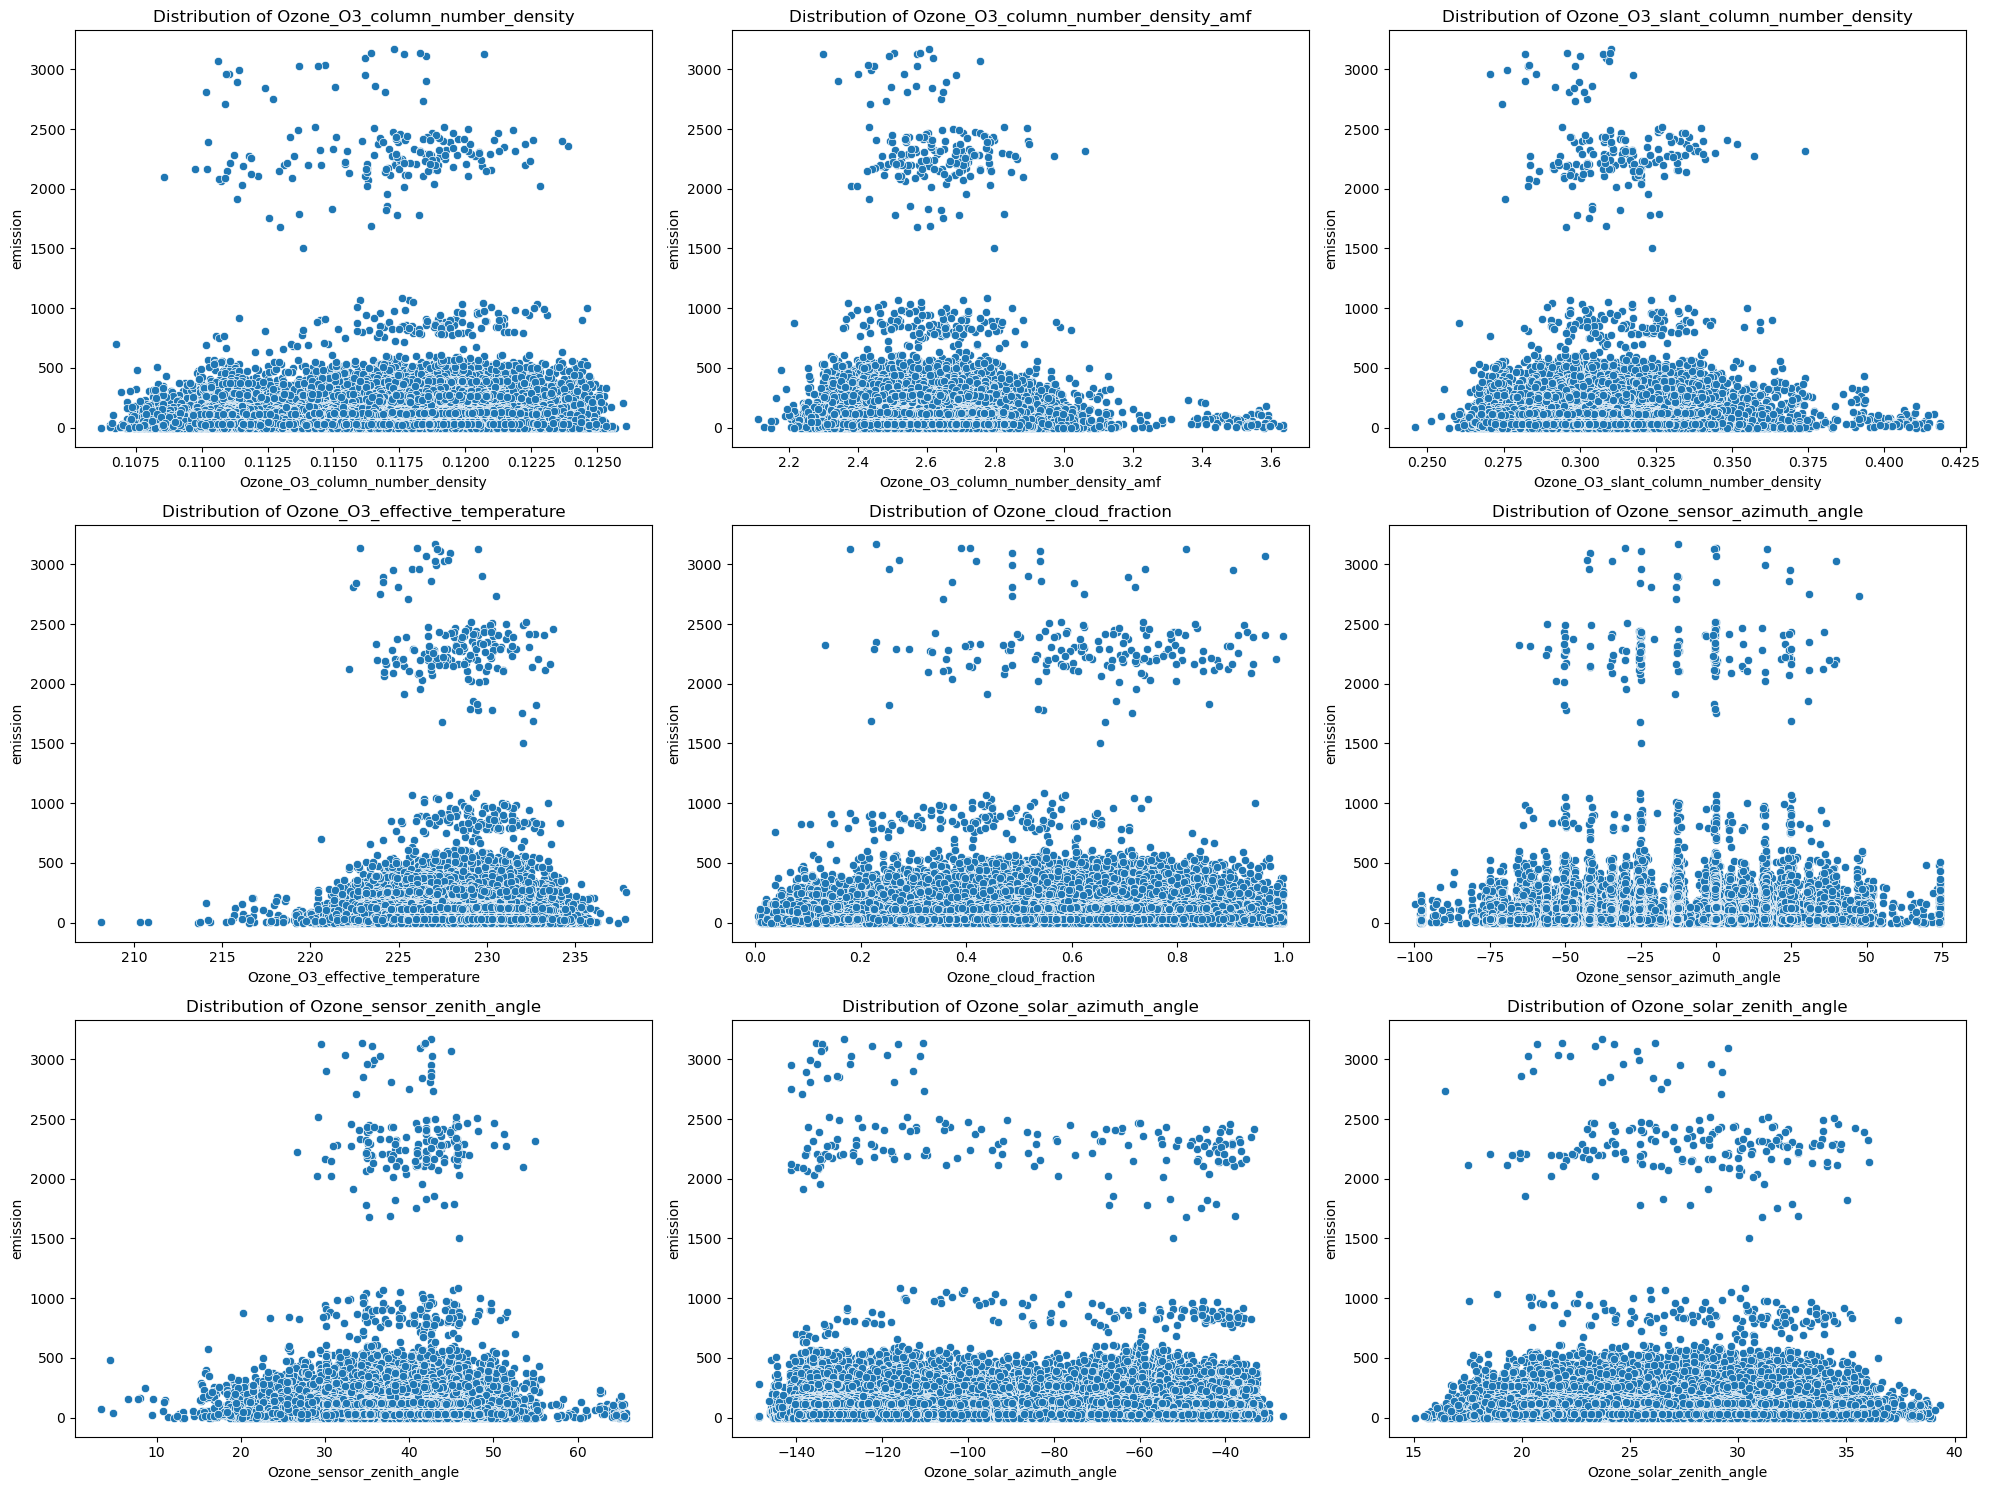

In [25]:
plt.figure(figsize=(20,15))
for index,column in enumerate(train.columns[48:57]):
    plt.subplot(3,3,index+1)
    sns.scatterplot(train, x=column, y='emission')
    plt.xlabel(column)
    plt.title(f"Distribution of {column}")
    plt.tight_layout()

## Cloud

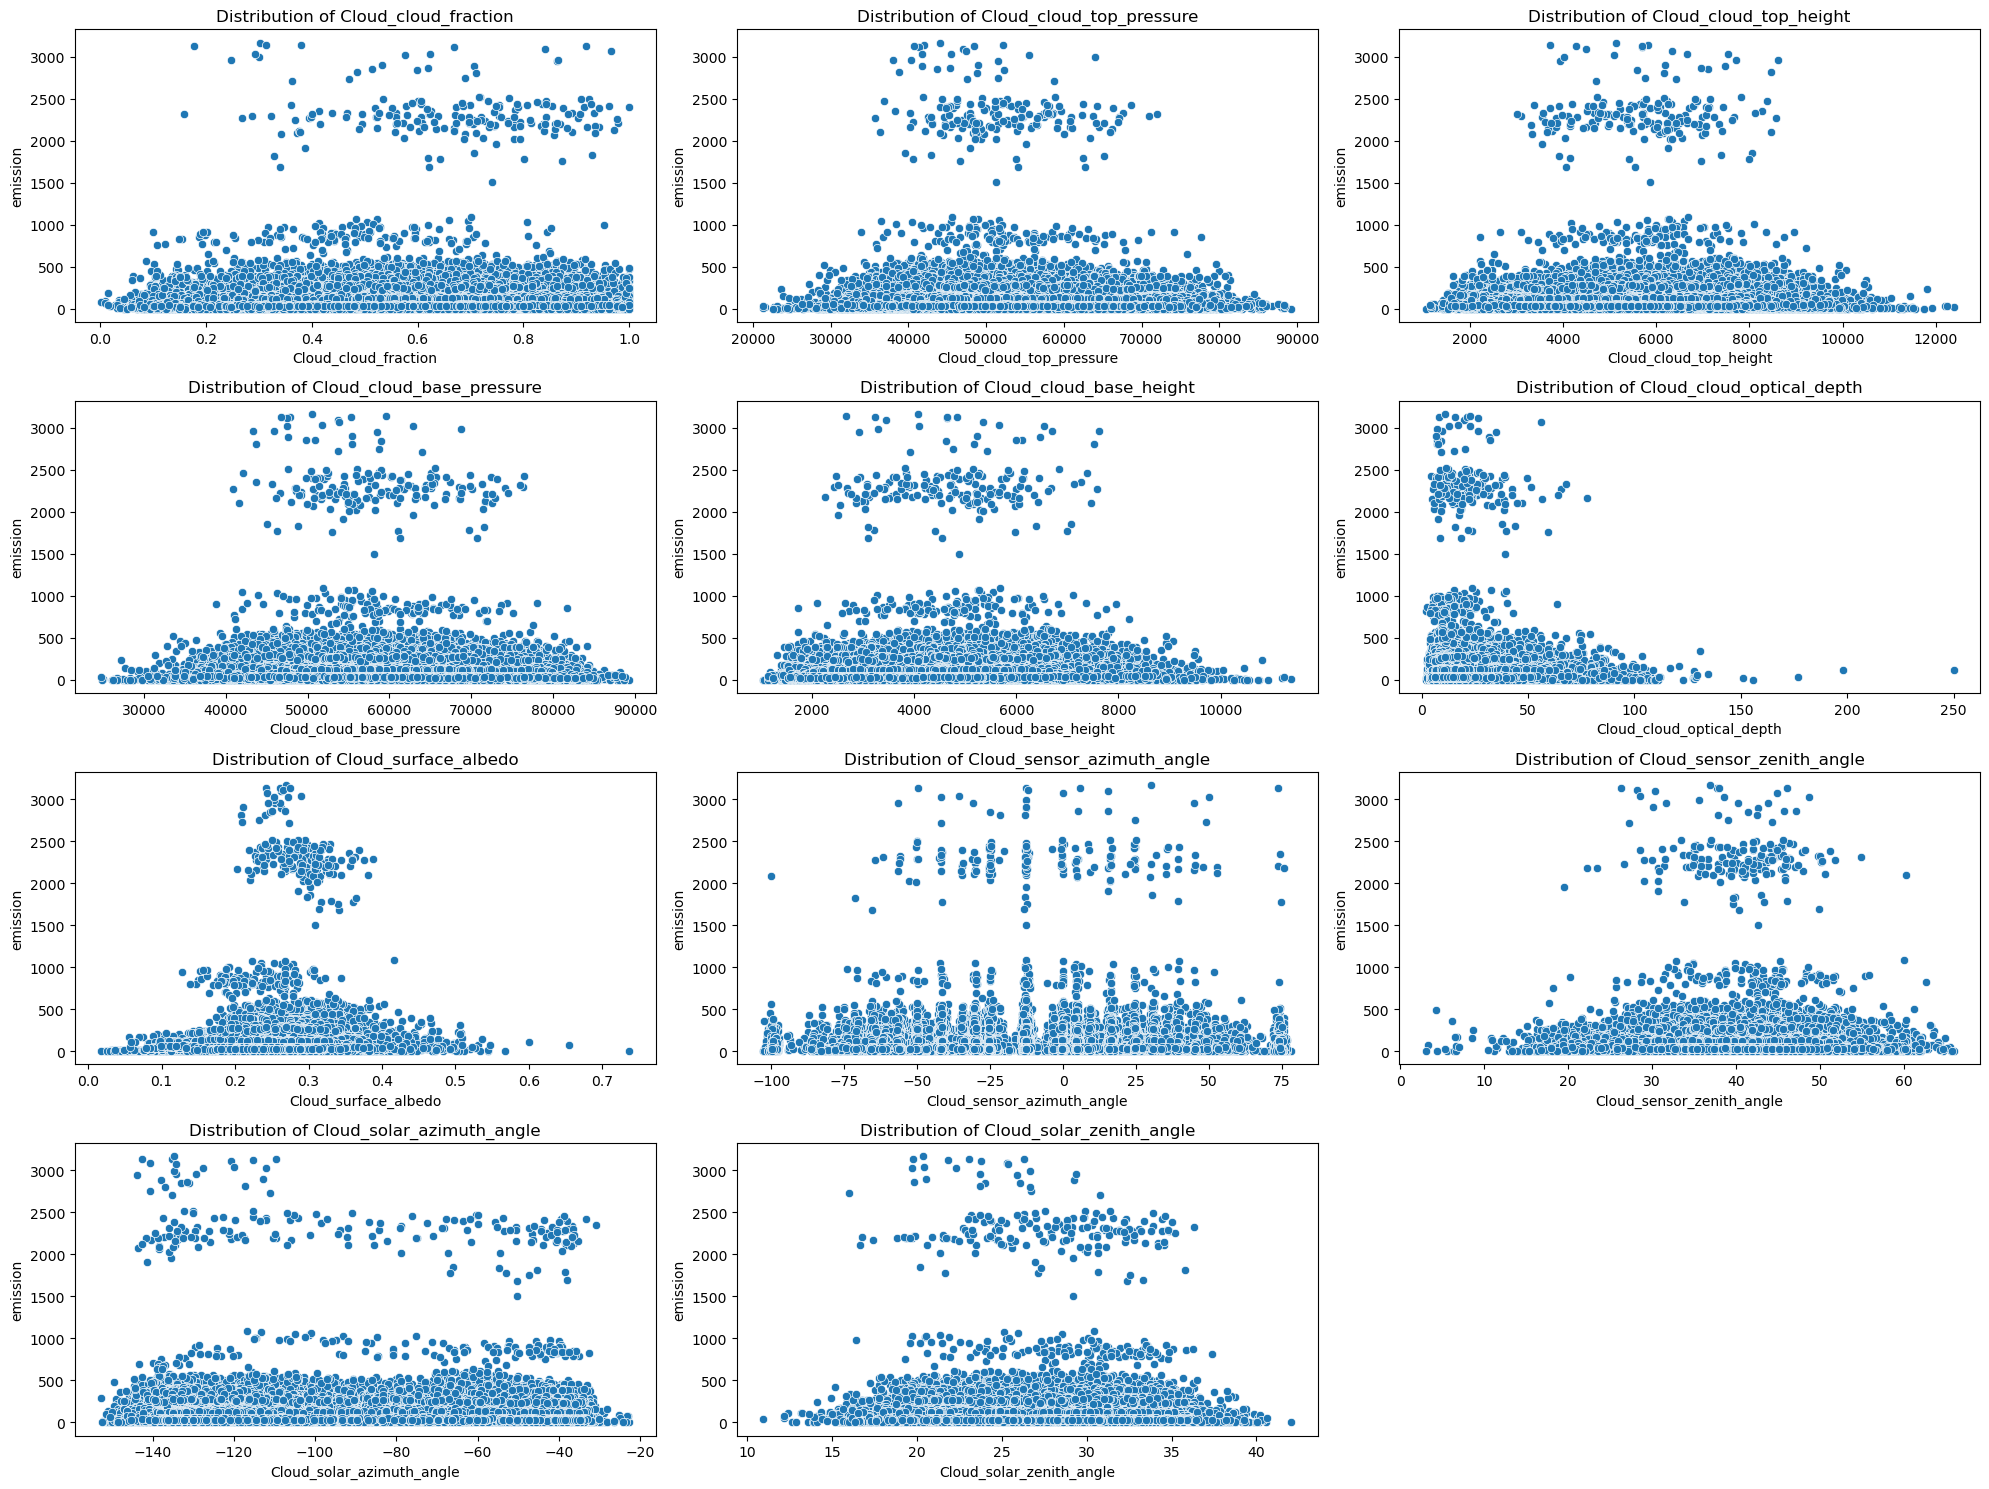

In [26]:
plt.figure(figsize=(20,15))
for index,column in enumerate(train.columns[57:68]):
    plt.subplot(4,3,index+1)
    sns.scatterplot(train, x=column, y='emission')
    plt.xlabel(column)
    plt.title(f"Distribution of {column}")
    plt.tight_layout()

# Multivariate Analysis
## Latitude and Longitude

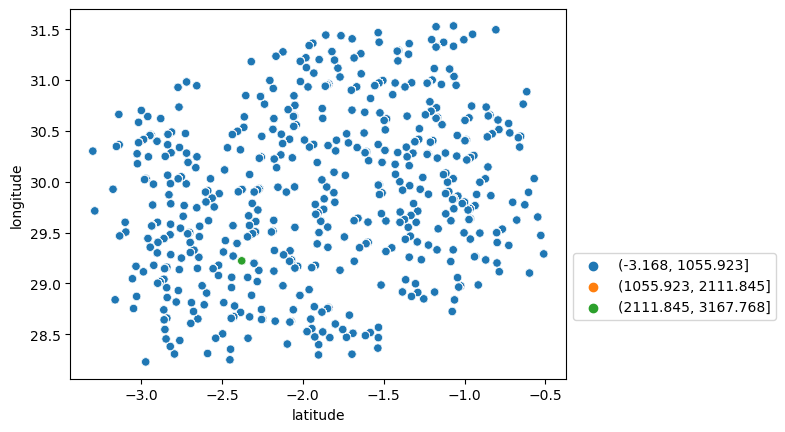

In [27]:
train['emission_level'] = pd.cut(train['emission'], bins=3)
sns.scatterplot(train, x='latitude', y='longitude', hue='emission_level').legend(loc='center left', bbox_to_anchor=(1,0.25), ncol=1)

train.drop('emission_level',axis=1, inplace=True)

# Correlation

In [28]:
uncorrelated = train.corr()['emission'][(train.corr()['emission']<0.005) & (train.corr()['emission']>-0.005)].index
train.drop(uncorrelated,axis=1,inplace=True)
test.drop(uncorrelated,axis=1,inplace=True)

<Axes: >

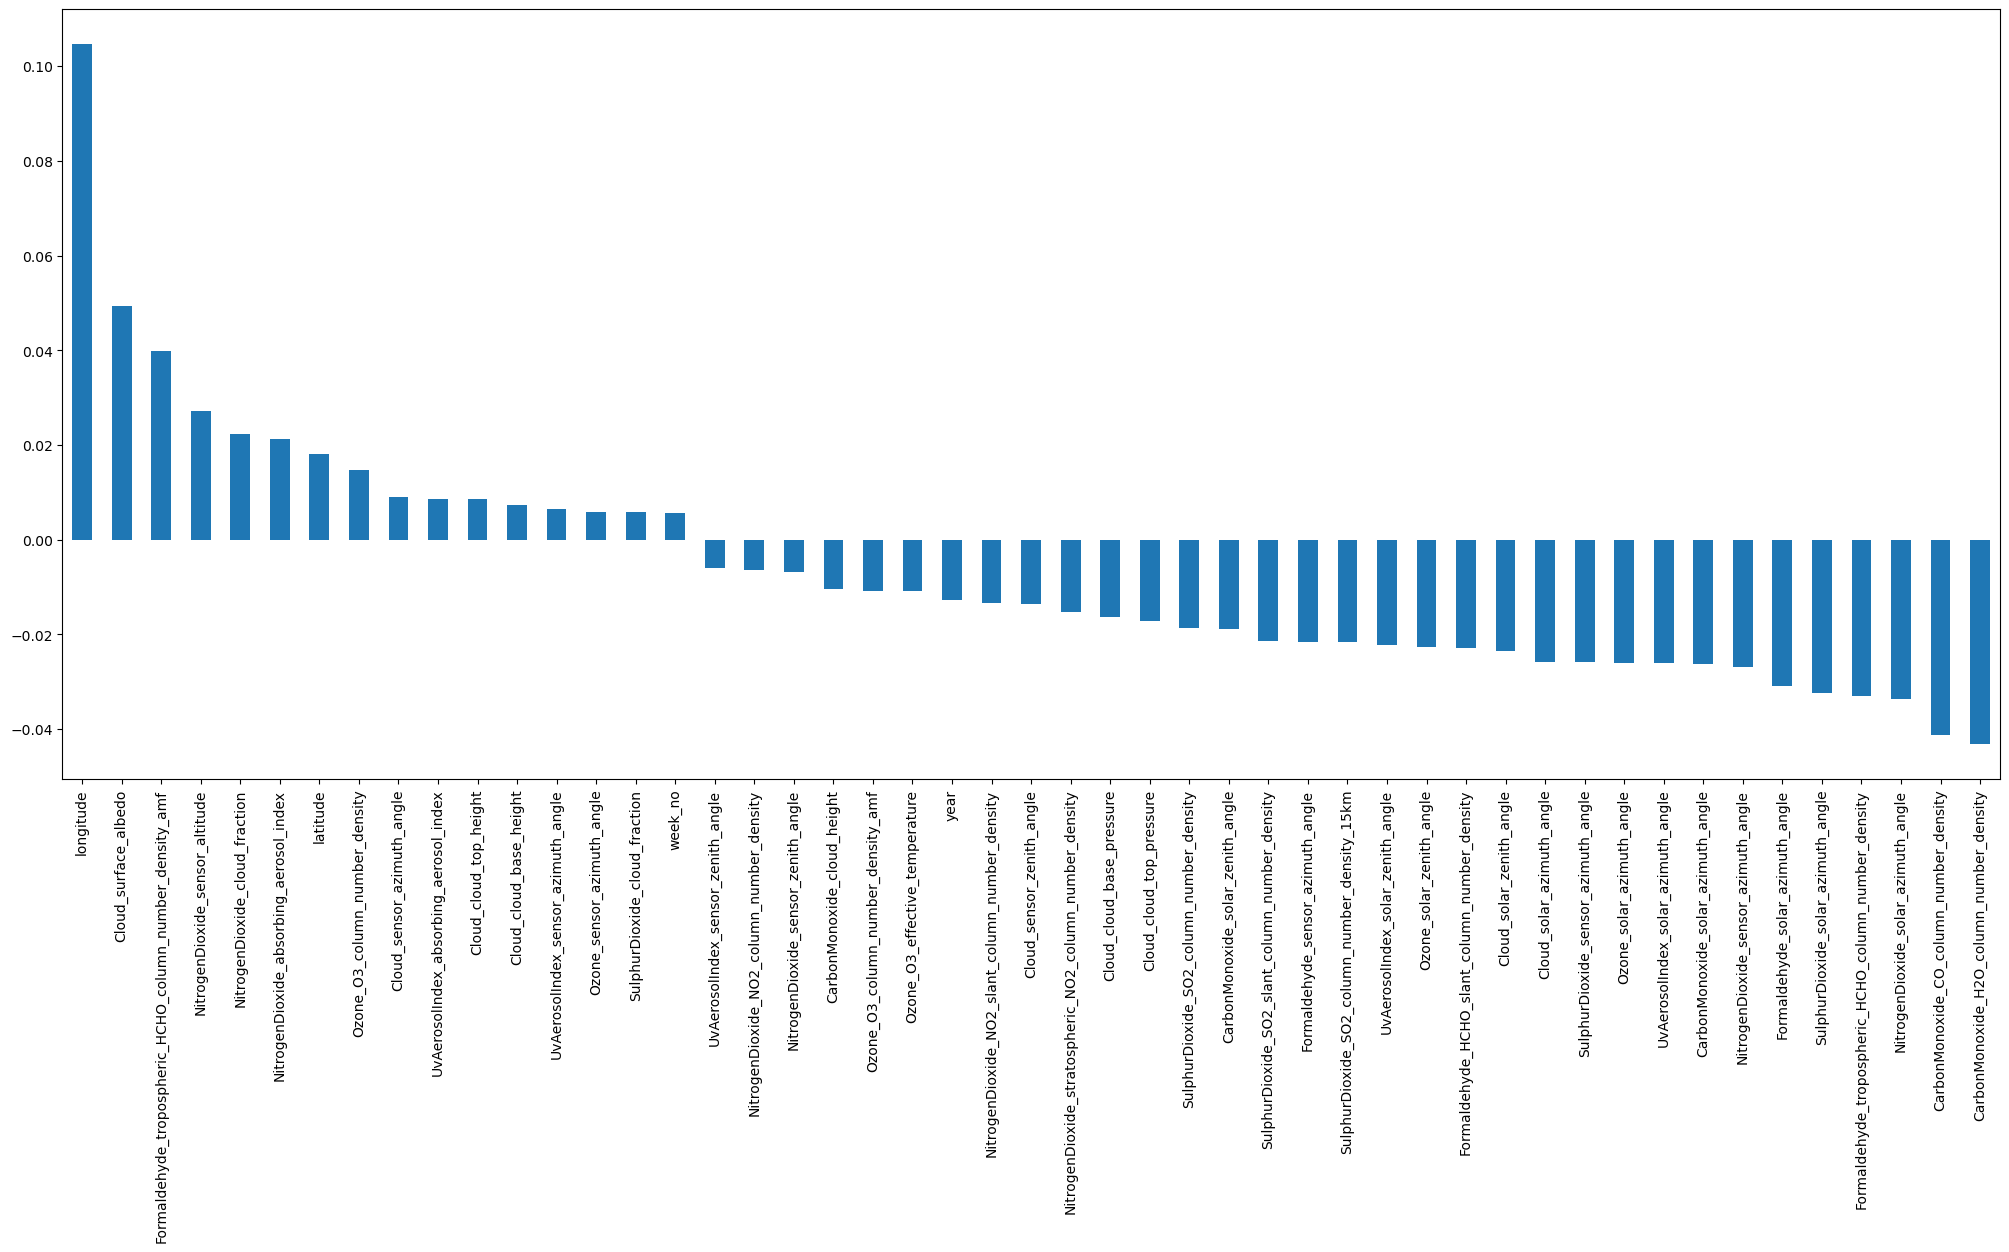

In [29]:
correlation = train.corr()['emission'].sort_values(ascending=False)
plt.figure(figsize=(25,10))
correlation[1:].plot(kind='bar')

# Outlier Analysis (on emissions)

In [30]:
# Getting Q1 and Q3
q1 = train['emission'].quantile(0.25)
q3 = train['emission'].quantile(0.75)
iqr = q3-q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

# Getting rows that are outliers
outliers = np.where((train['emission'] > upper) | (train['emission'] < lower))[0]

# Dropping the outliers
train.drop(train.index[outliers], axis=0, inplace=True)

# Data Cleaning Pt.2
## Filling in missing values

In [31]:
# Redefining missing_data after dropping some features and rows
missing_data = pd.DataFrame(train.isnull().sum()[train.isnull().sum() != 0].sort_values(ascending = False),
                            columns = ["Number of missing rows"])
missing_data['% of total'] = missing_data.apply(lambda row: round(row/len(train)*100,2))

for feature in missing_data.index:
    train[feature].fillna(train[feature].mean(), inplace=True)
    test[feature].fillna(test[feature].mean(), inplace=True)

# Model Selection

In [32]:
rmse = []

def modeling(model):
    X = train.drop(['ID_LAT_LON_YEAR_WEEK','emission'],axis=1)
    y = train['emission']
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    rmse.append(round(np.sqrt(mean_squared_error(y_test,predictions)),2))
    
    sns.scatterplot(x=y_test, y=predictions)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted')

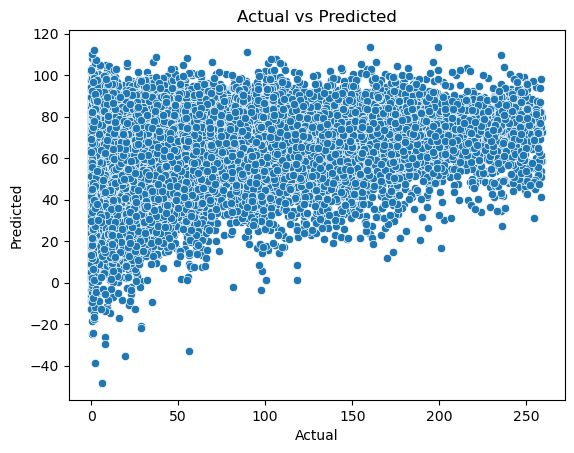

In [33]:
modeling(LinearRegression())

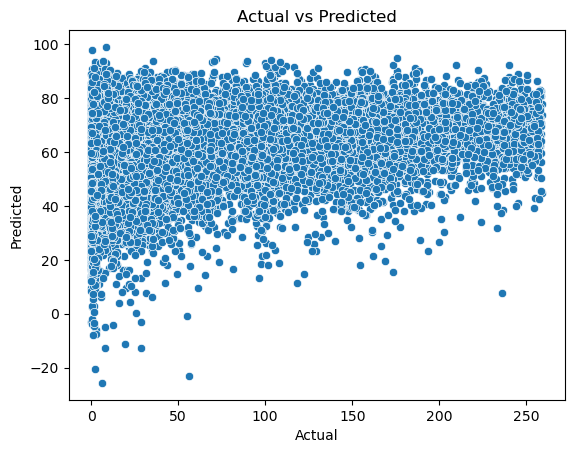

In [34]:
modeling(ElasticNet(alpha=0.5, l1_ratio=0.5))

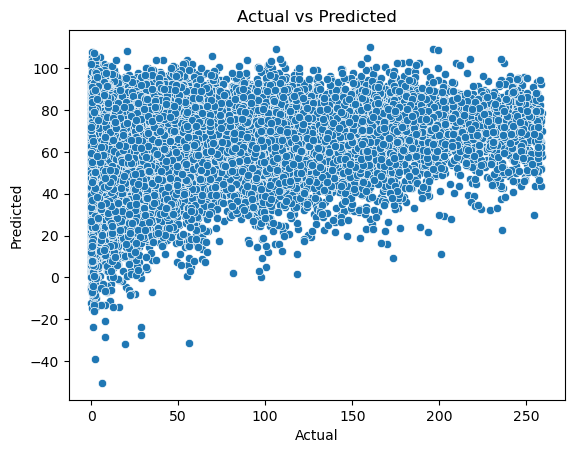

In [35]:
modeling(BayesianRidge())

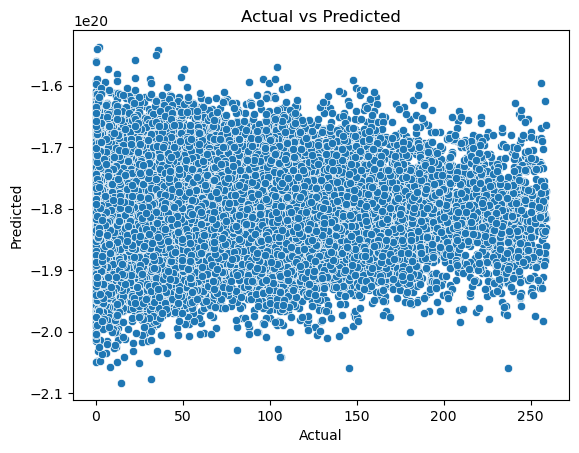

In [36]:
modeling(SGDRegressor(loss='squared_error', penalty='l2'))

Learning rate set to 0.075656
0:	learn: 60.5681120	total: 77.2ms	remaining: 1m 17s
1:	learn: 59.2687438	total: 94.2ms	remaining: 47s
2:	learn: 58.1167200	total: 112ms	remaining: 37.3s
3:	learn: 57.1063964	total: 131ms	remaining: 32.5s
4:	learn: 56.2350550	total: 149ms	remaining: 29.7s
5:	learn: 55.4271403	total: 167ms	remaining: 27.7s
6:	learn: 54.6384990	total: 187ms	remaining: 26.5s
7:	learn: 53.9197011	total: 205ms	remaining: 25.5s
8:	learn: 53.2064170	total: 227ms	remaining: 25s
9:	learn: 52.6236125	total: 245ms	remaining: 24.2s
10:	learn: 52.0962220	total: 263ms	remaining: 23.6s
11:	learn: 51.6772187	total: 279ms	remaining: 23s
12:	learn: 51.2053336	total: 297ms	remaining: 22.5s
13:	learn: 50.7054959	total: 313ms	remaining: 22s
14:	learn: 50.3208854	total: 330ms	remaining: 21.6s
15:	learn: 50.0059875	total: 345ms	remaining: 21.2s
16:	learn: 49.6543815	total: 363ms	remaining: 21s
17:	learn: 49.3188573	total: 384ms	remaining: 21s
18:	learn: 48.9374041	total: 401ms	remaining: 20.7s
1

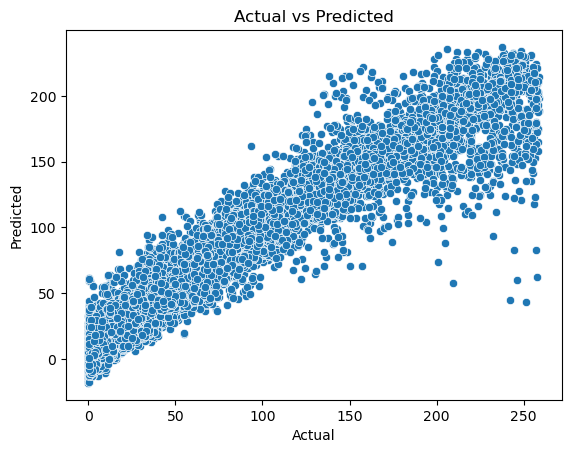

In [37]:
modeling(CatBoostRegressor())

In [38]:
evaluation = pd.DataFrame(rmse, columns=['rmse'], 
                          index=['Linear Regression', 'ElasticNet', 'Bayesian Ridge', 'SGDRegressor', 'CatBoost Regressor'])
evaluation

rmse
Linear Regression   5.973000e+01
ElasticNet          6.061000e+01
Bayesian Ridge      5.982000e+01
SGDRegressor        1.809002e+20
CatBoost Regressor  1.653000e+01

As we can see, CatBoost performed the best. Therefore, we will be using CatBoost as our model to predict CO2 emissions.

# Submission

In [39]:
X_train = train.drop(['ID_LAT_LON_YEAR_WEEK','emission'],axis=1)
y_train = train['emission']

X_test = test.drop('ID_LAT_LON_YEAR_WEEK',axis=1)

submission_model = CatBoostRegressor()
submission_model.fit(X_train, y_train)
predictions = submission_model.predict(X_test)

submission = pd.DataFrame(test['ID_LAT_LON_YEAR_WEEK'])
submission['emission'] = predictions

submission.head()

Learning rate set to 0.080598
0:	learn: 60.7758311	total: 25.1ms	remaining: 25s
1:	learn: 59.3479915	total: 46.1ms	remaining: 23s
2:	learn: 58.1526213	total: 67.4ms	remaining: 22.4s
3:	learn: 57.0759795	total: 88.5ms	remaining: 22s
4:	learn: 56.0996599	total: 112ms	remaining: 22.2s
5:	learn: 55.2179188	total: 131ms	remaining: 21.7s
6:	learn: 54.3564159	total: 151ms	remaining: 21.4s
7:	learn: 53.6010165	total: 173ms	remaining: 21.4s
8:	learn: 52.9154162	total: 192ms	remaining: 21.2s
9:	learn: 52.3084851	total: 215ms	remaining: 21.3s
10:	learn: 51.7647010	total: 238ms	remaining: 21.4s
11:	learn: 51.1601150	total: 260ms	remaining: 21.4s
12:	learn: 50.6708146	total: 277ms	remaining: 21.1s
13:	learn: 50.2529550	total: 296ms	remaining: 20.8s
14:	learn: 49.7860393	total: 319ms	remaining: 21s
15:	learn: 49.3833745	total: 340ms	remaining: 20.9s
16:	learn: 49.0069699	total: 362ms	remaining: 20.9s
17:	learn: 48.6437347	total: 385ms	remaining: 21s
18:	learn: 48.3966542	total: 405ms	remaining: 20.9

ID_LAT_LON_YEAR_WEEK   emission
0  ID_-0.510_29.290_2022_00 -13.677900
1  ID_-0.510_29.290_2022_01   4.721503
2  ID_-0.510_29.290_2022_02   4.561397
3  ID_-0.510_29.290_2022_03   5.436812
4  ID_-0.510_29.290_2022_04   2.408044

In [40]:
submission.to_csv('submission.csv',index=False)